# Admixture

* I estimated admixture proportions using NGSadmix with genotype likelihoods across all samples (minus related individuals) in each pair of urban-rural environement estimated in ANGSD
 - I ran all K values from 2 to 10 10 times, each with a different random seed
 - Uses same 4fold SNPs as above
* **IMPORTANT NOTE** : **THIS SCRIPT IS BASED ON THE SCRIPTS THAT PLOT ADMIXTURE WITH THE BEST K OF EVANNO, BUT SOME UGLY MODIFICATIONS WERE MADE SO THAT IT PLOTS K=2 NO MATTER WHAT THE BEST K IS (SO THE CODE IS WEIRD BUT WORKS)**

## Setup

In [1]:
# Libraries
library("IRdisplay")
library(tidyverse)
library(wesanderson)
library(RColorBrewer)



── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Path to results for this project
results_prefix <- '/scratch/projects/trifolium/glue/demography/glue_demography/results/'


In [3]:
# Function to load NGSadmix log files
load_ngsadmix_log <- function(path){
    seed <- as.numeric(str_extract(basename(path), pattern = '(?<=seed)[0-9]+(?=\\.log)'))
    
    logfile <- readLines(path)[9]  ## 9 index is for line with likelihood
    like <- as.numeric(str_extract(logfile, pattern = '(?<=like=)-[0-9]+\\.[0-9]+'))
    
    df_out <- data.frame(seed = seed, like = like)
    return(df_out)
}

In [4]:
# File of samples order per city
list<-c("Albuquerque", "Antwerp", "Armidale","Athens","Bogota","Buenos_Aires",
        "Calgary","Canberra","Cape_Town","Christchurch","Hiroshima","Kunming"
        ,"Kyoto","Landshut","Linkoping","Loja","Medellin","Melbourne","Memphis",
        "Mexico_City","Munich","Paris","Quito","Tehran","Thessaloniki","Toronto")
samples<-as.data.frame(read.table("/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/resources/glue_pc_sampleSheet.txt", header=TRUE, sep="\t"))
samples$site<-gsub("u","tem",as.character(samples$site))
samples$site<-gsub("r","Rural",as.character(samples$site))
samples$site<-gsub("tem","Urban",as.character(samples$site))
head(samples)

for (city in list){
    detail <- read.table(paste0("/scratch/projects/trifolium/glue/demography/glue_demography/results/program_resources/bam_lists/by_city/withoutRelated/",city,"/",city,"_4fold_lowCovRemoved_bams.list"))
    detail$V1<-gsub("/scratch/projects/trifolium/glue/pc/results/bam/4fold/","",as.character(detail$V1))
    detail$V1<-gsub("_4fold.bam","",as.character(detail$V1))
    name <-paste0(city,'_order_detail')
    tmp <-merge(samples, detail,  by.x="sample", by.y="V1", all.x=FALSE, all.y=TRUE, sort=FALSE) 
    assign(name,tmp)
    }
    
head(Paris_order_detail)

,continent,city,pop,individual,site,sample,range,library,lane
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,NAM,Albuquerque,29,5,Rural,Albuquerque_29_5,Introduced,glue_low1,1
2,NAM,Albuquerque,29,9,Rural,Albuquerque_29_9,Introduced,glue_low1,1
3,NAM,Albuquerque,32,13,Rural,Albuquerque_32_13,Introduced,glue_low1,1
4,NAM,Albuquerque,32,3,Rural,Albuquerque_32_3,Introduced,glue_low1,1
5,NAM,Albuquerque,33,2,Rural,Albuquerque_33_2,Introduced,glue_low1,1
6,NAM,Albuquerque,33,7,Rural,Albuquerque_33_7,Introduced,glue_low1,1


,sample,continent,city,pop,individual,site,range,library,lane
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,Paris_11_9,EU,Paris,11,9,Rural,Native,glue_low1,1
2,Paris_11_6,EU,Paris,11,6,Rural,Native,glue_low1,1
3,Paris_13_3,EU,Paris,13,3,Rural,Native,glue_low1,1
4,Paris_13_13,EU,Paris,13,13,Rural,Native,glue_low1,1
5,Paris_15_13,EU,Paris,15,13,Rural,Native,glue_low1,1
6,Paris_6_1,EU,Paris,6,1,Rural,Native,glue_low1,1


## Albuquerque

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 6"

sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Albuquerque_29_5,NAM,Albuquerque,29,5,Rural,Introduced,glue_low1,1,X1,1.00000
Albuquerque_29_5,NAM,Albuquerque,29,5,Rural,Introduced,glue_low1,1,X2,0.00000
Albuquerque_29_9,NAM,Albuquerque,29,9,Rural,Introduced,glue_low1,1,X1,0.42442
Albuquerque_29_9,NAM,Albuquerque,29,9,Rural,Introduced,glue_low1,1,X2,0.57558
Albuquerque_32_13,NAM,Albuquerque,32,13,Rural,Introduced,glue_low1,1,X1,0.28602
Albuquerque_32_13,NAM,Albuquerque,32,13,Rural,Introduced,glue_low1,1,X2,0.71398


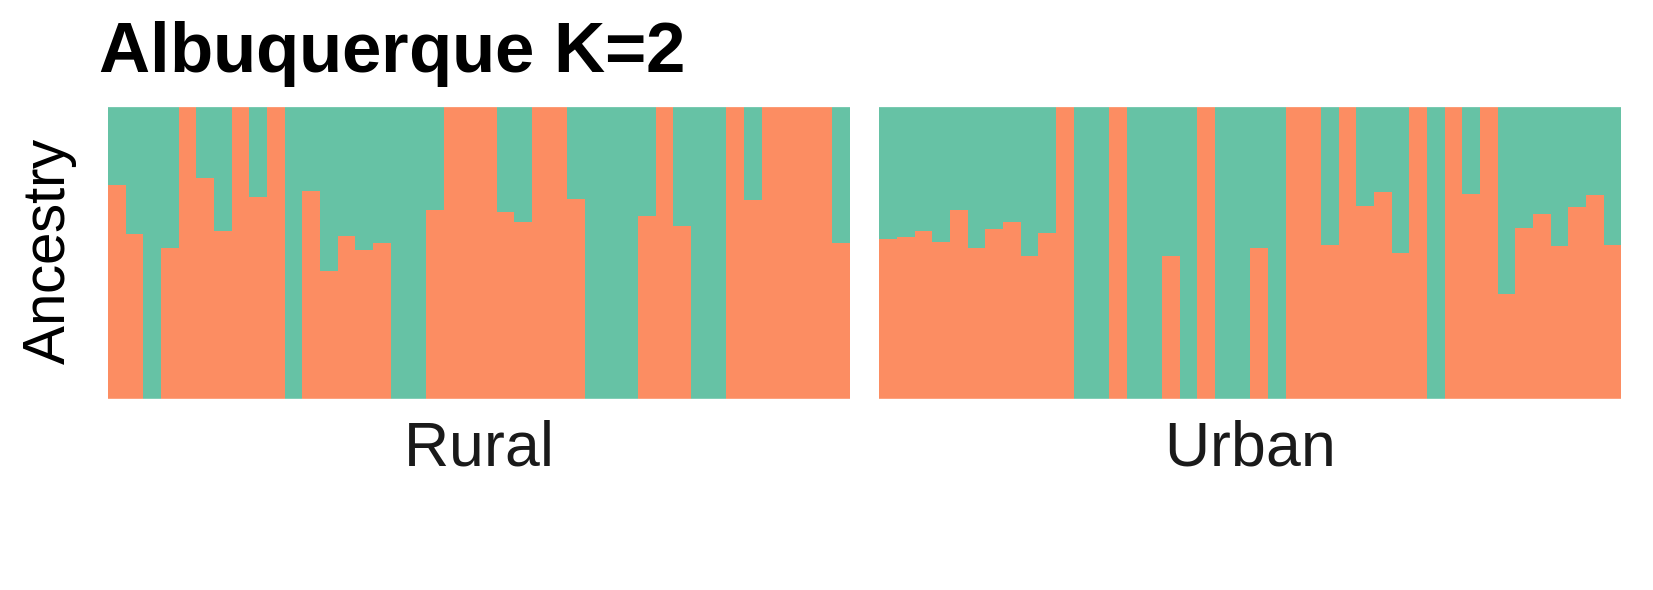

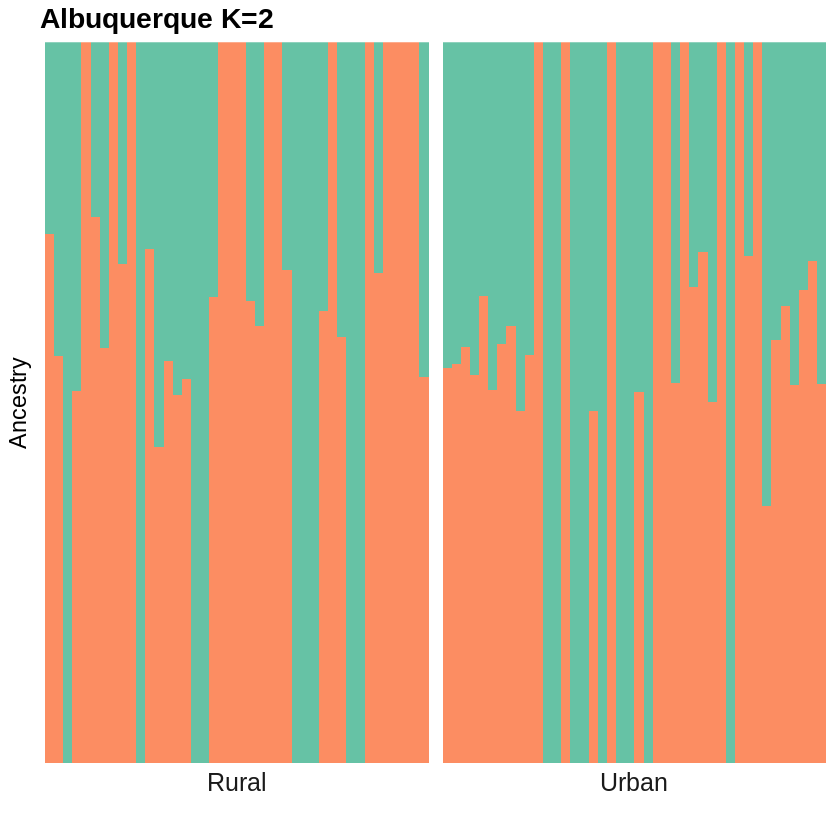

In [8]:
city <- 'Albuquerque'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-split[[1]][11]


# Load  K2 file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K2/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])

# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K2/ngsadmix_',city,'_4fold_maf0.05_K2_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Albuquerque_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=2, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Albuquerque K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Albuquerque_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Albuquerque_K2.png"
display_png(file=path_to_kplot)

## Antwerp

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 8"

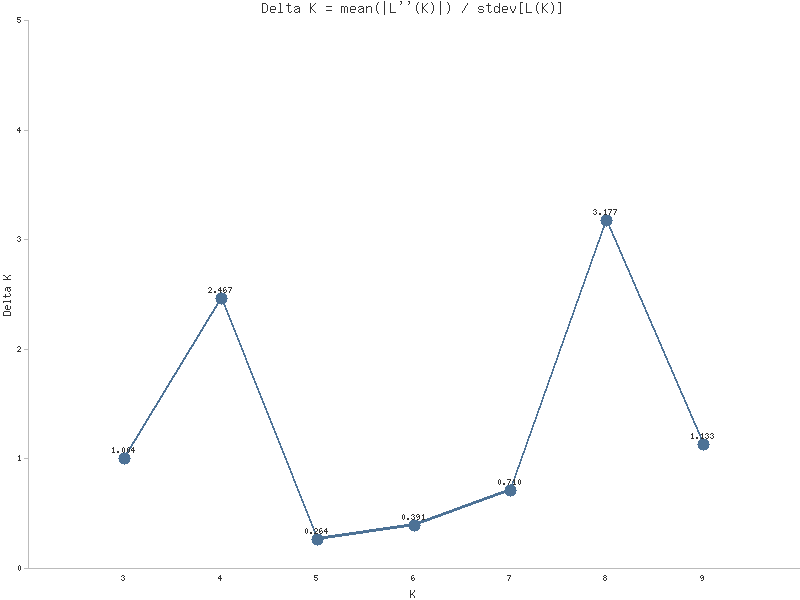

In [9]:
city <- 'Antwerp'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")

# We want to plot the 2
bestK<-2

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Antwerp_36_4,EU,Antwerp,36,4,Rural,Native,glue_low1,1,X1,0.48408
Antwerp_36_4,EU,Antwerp,36,4,Rural,Native,glue_low1,1,X2,0.51592
Antwerp_36_8,EU,Antwerp,36,8,Rural,Native,glue_low1,1,X1,1.00000
Antwerp_36_8,EU,Antwerp,36,8,Rural,Native,glue_low1,1,X2,0.00000
Antwerp_37_13,EU,Antwerp,37,13,Rural,Native,glue_low1,1,X1,0.37383
Antwerp_37_13,EU,Antwerp,37,13,Rural,Native,glue_low1,1,X2,0.62617


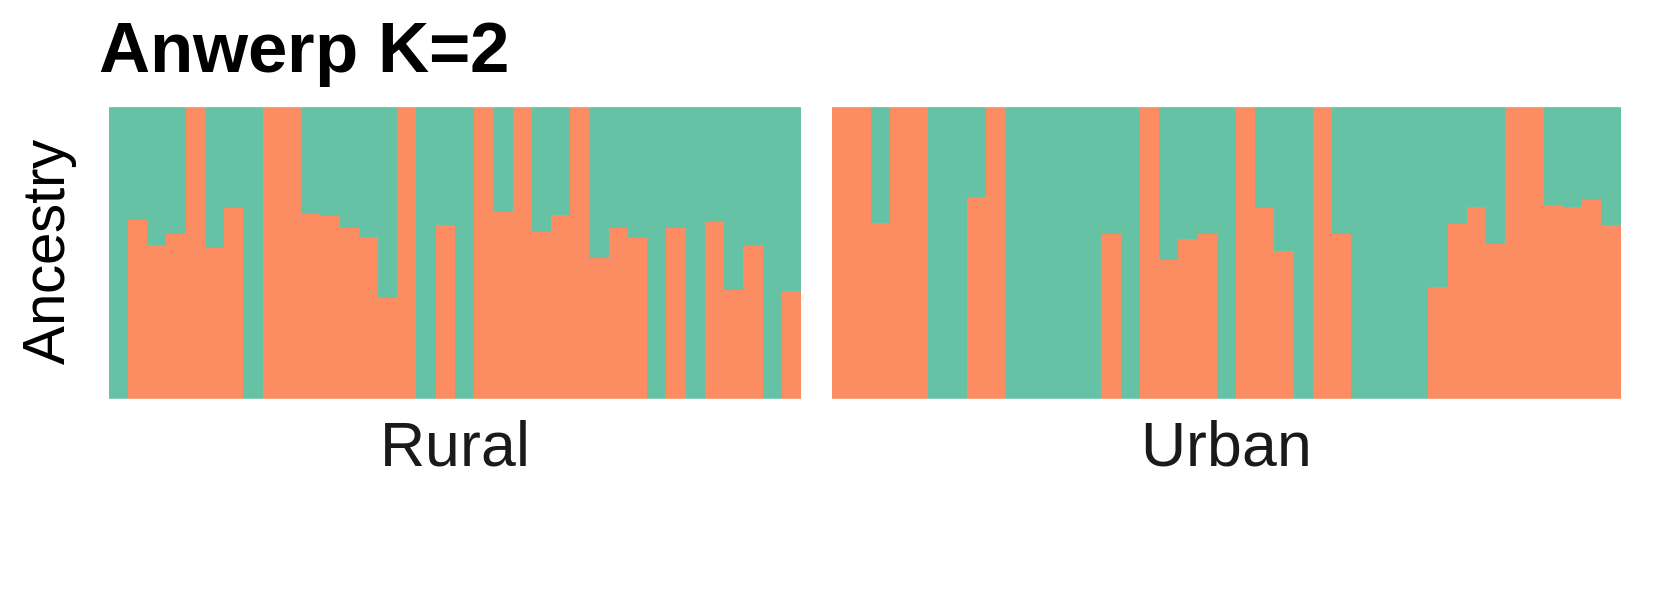

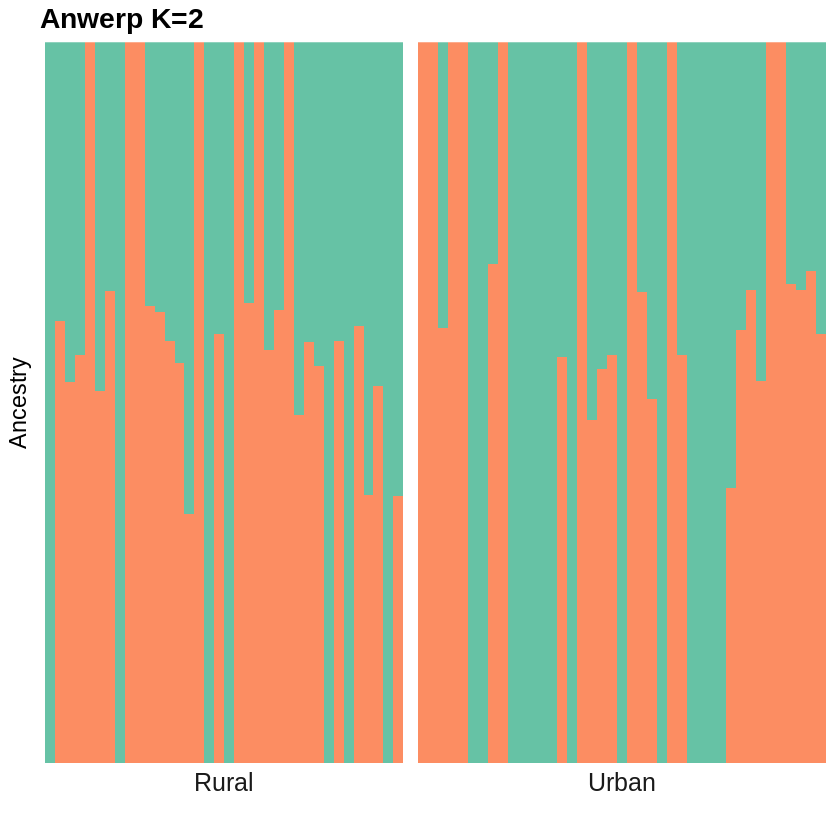

In [11]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Antwerp_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Anwerp K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Antwerp_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Antwerp_K2.png"
display_png(file=path_to_kplot)

## Armidale

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

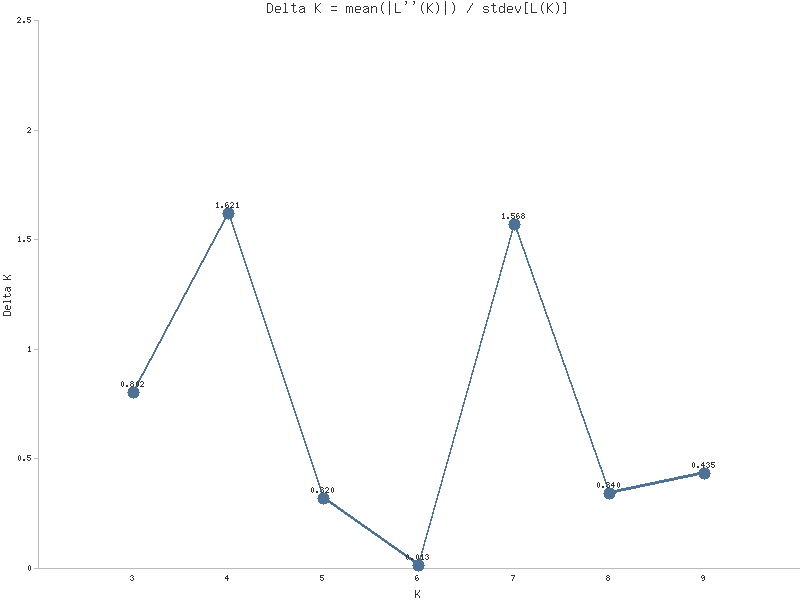

In [13]:
city <- 'Armidale'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2


# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



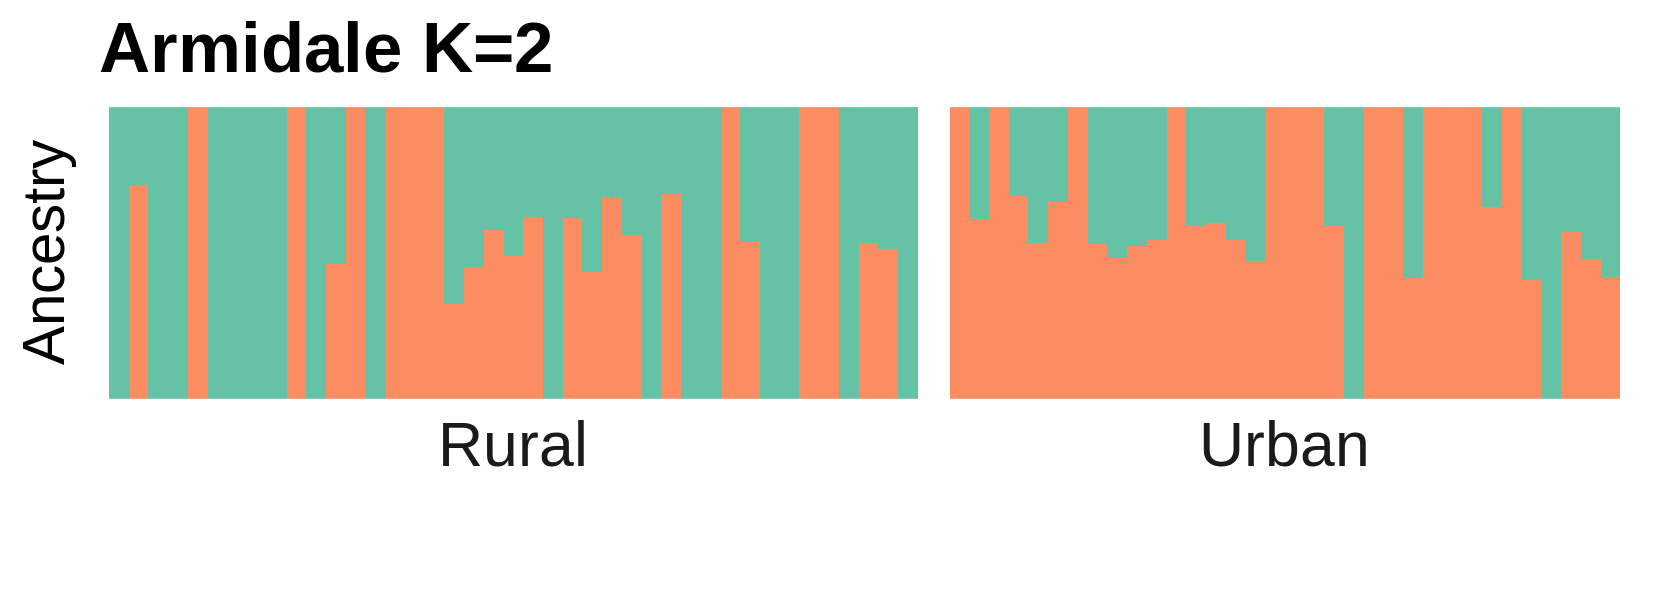

In [14]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Armidale_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Armidale K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 


ggsave(
  "ADMIX_Armidale_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Armidale_K2.png"
display_png(file=path_to_kplot)

## Athens

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

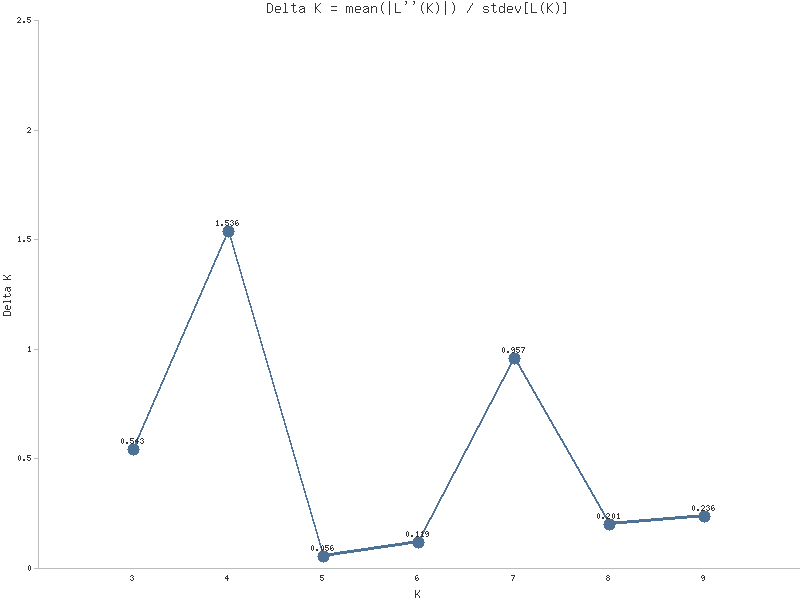

In [15]:
city <- 'Athens'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



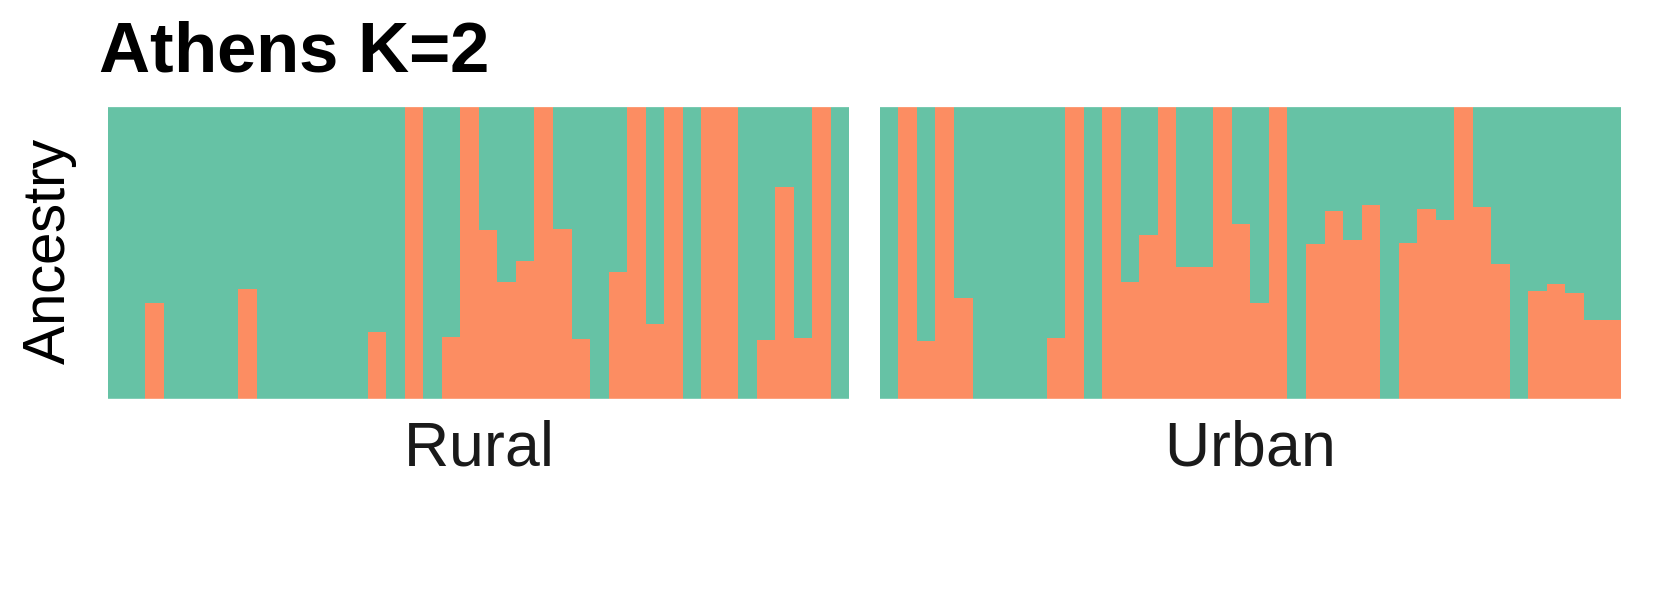

In [16]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Athens_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Athens K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 


ggsave(
  "ADMIX_Athens_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Athens_K2.png"
display_png(file=path_to_kplot)

## Bogota

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 8"

[1] 2

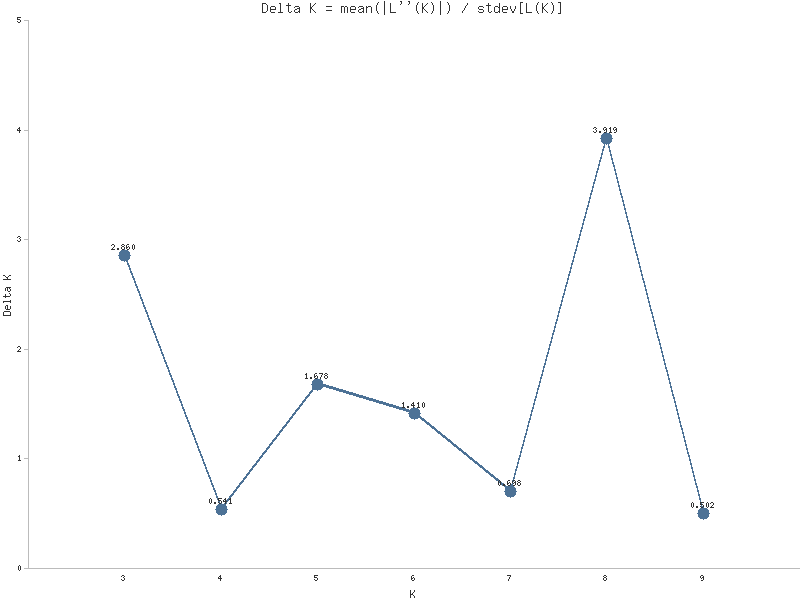

In [17]:
city <- 'Bogota'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



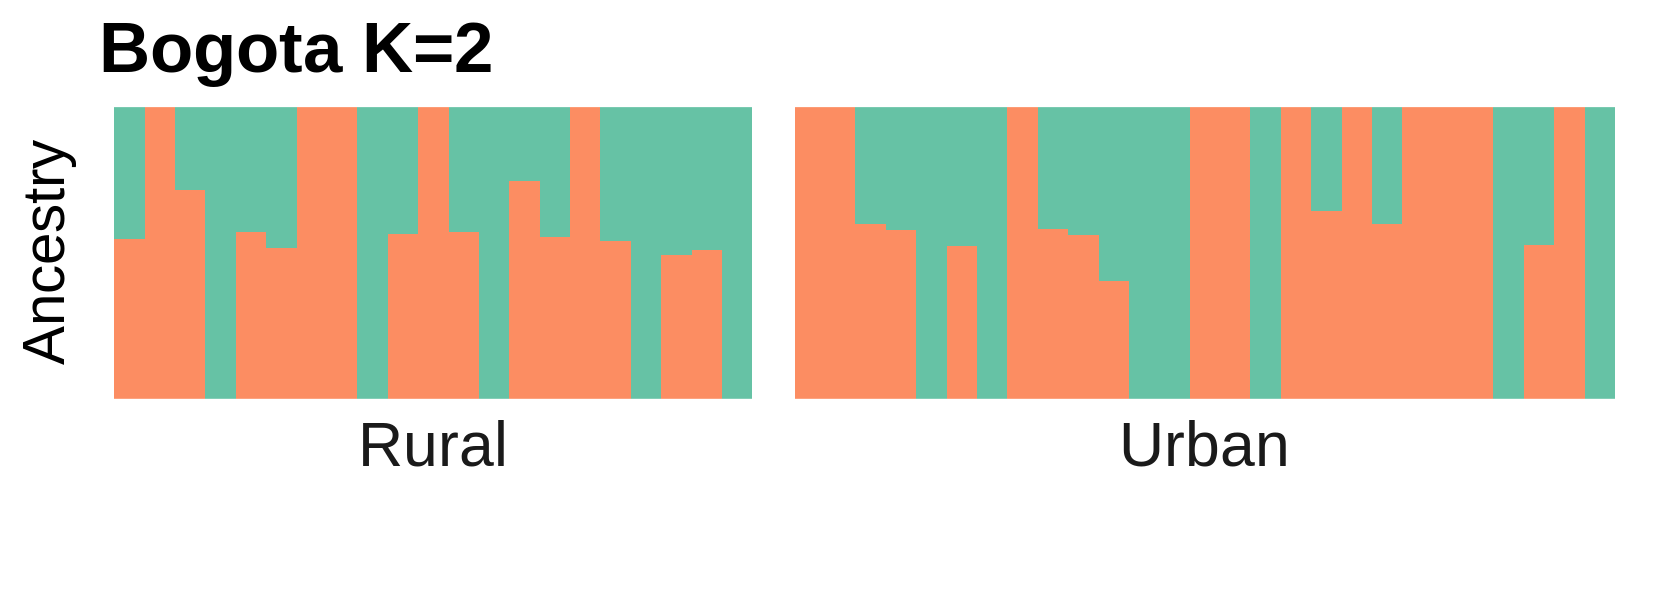

In [18]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Bogota_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Bogota K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
ggsave(
  "ADMIX_Bogota_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Bogota_K2.png"
display_png(file=path_to_kplot)

## Buenos_Aires

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

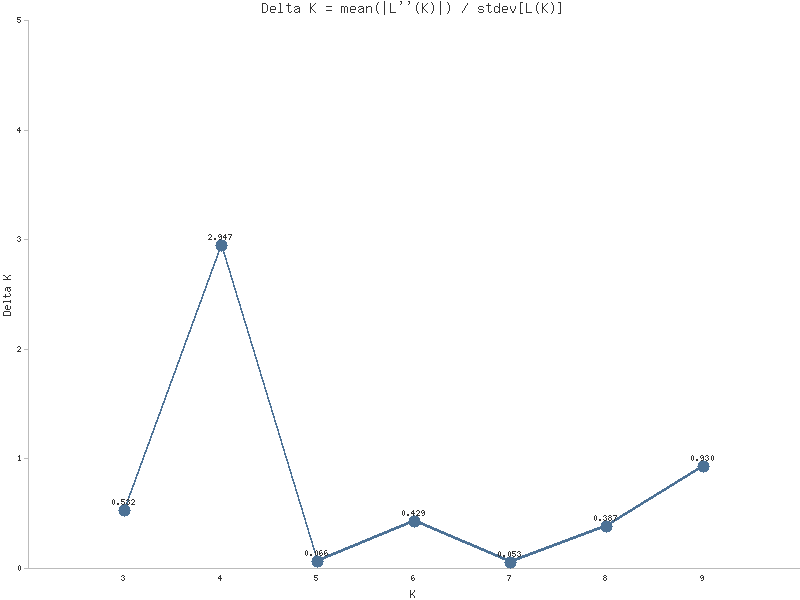

In [19]:
city <- 'Buenos_Aires'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



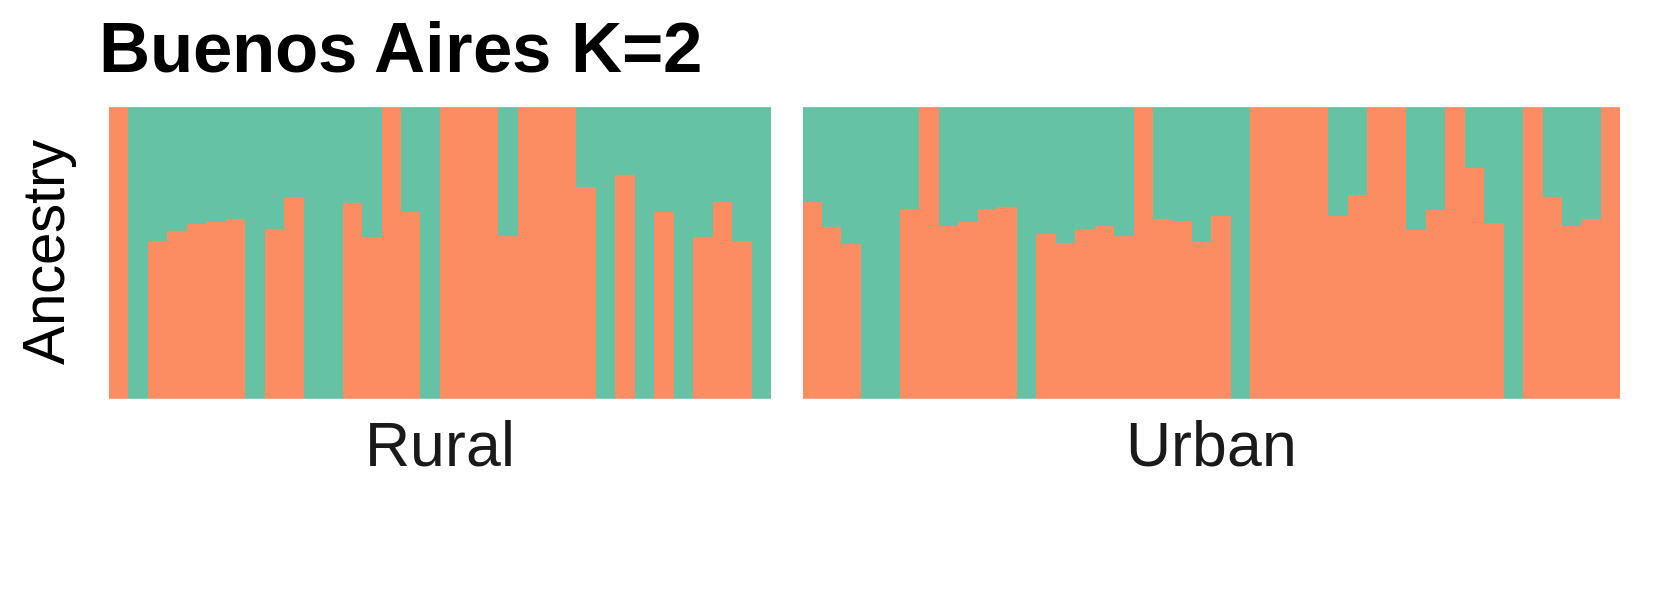

In [20]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Buenos_Aires_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))


kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Buenos Aires K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
  #scale_fill_manual(values = cols_admix) + 
  #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  

ggsave(
  "ADMIX_Buenos_Aires_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Buenos_Aires_K2.png"
display_png(file=path_to_kplot)

## Calgary

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 9"

[1] 2

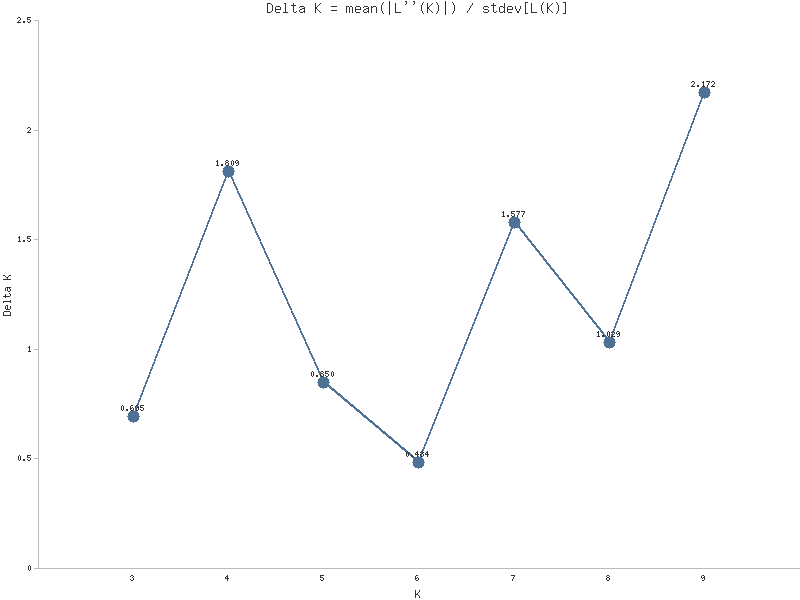

In [21]:
city <- 'Calgary'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



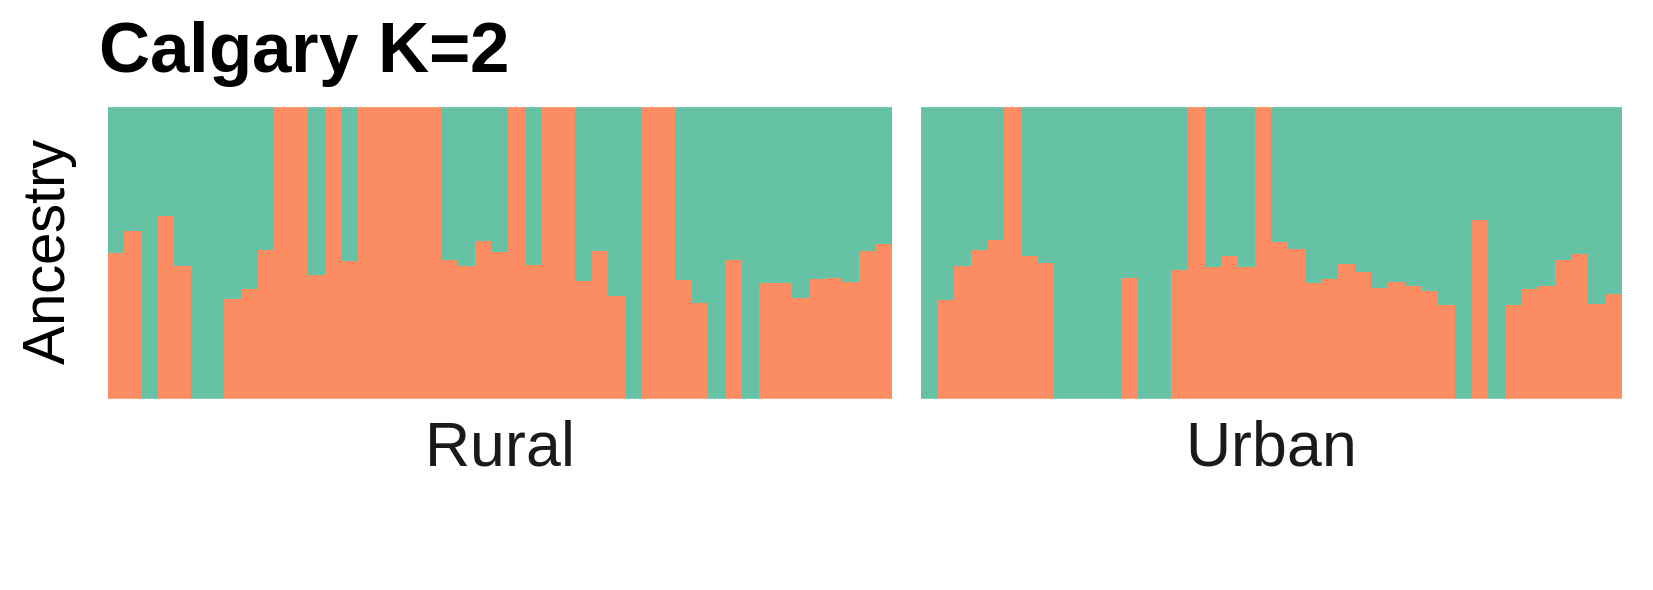

In [22]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Calgary_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

cols_admix <- c('#66C2A5','#FC8D62','#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#6A3D9A')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Calgary K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
  scale_fill_manual(values = cols_admix) + 
  scale_color_manual(values = cols_admix) +
  #scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
ggsave(
  "ADMIX_Calgary_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Calgary_K2.png"
display_png(file=path_to_kplot)

## Canberra

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

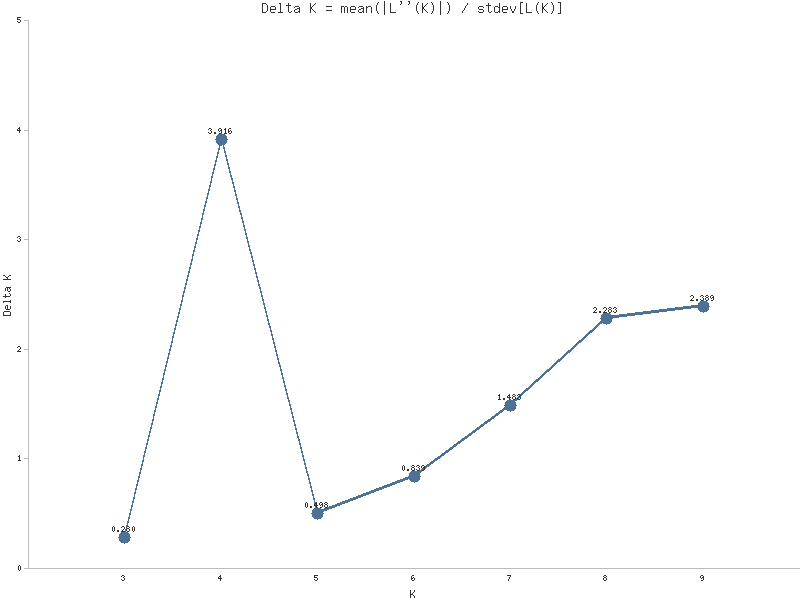

In [23]:
city <- 'Canberra'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



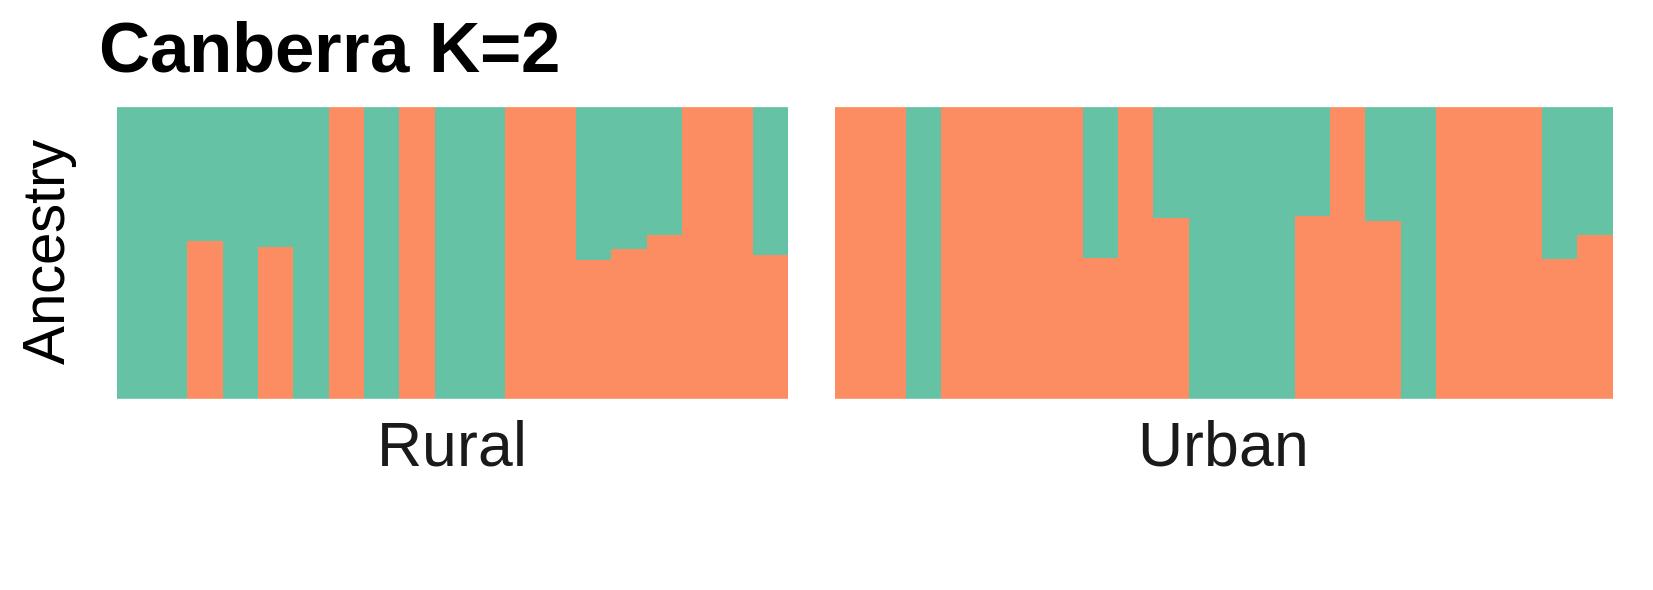

In [24]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Canberra_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Canberra K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  

ggsave(
  "ADMIX_Canberra_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Canberra_K2.png"
display_png(file=path_to_kplot)

## Cape_Town

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

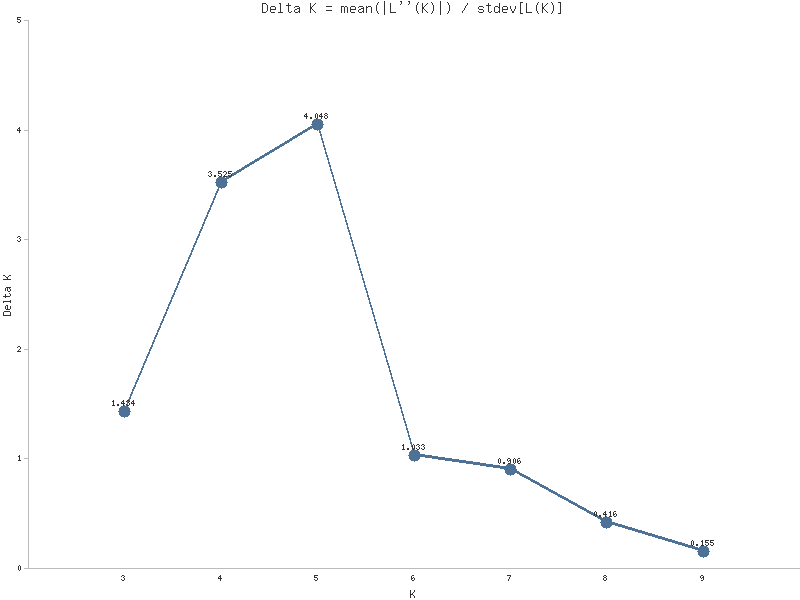

In [25]:
city <- 'Cape_Town'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



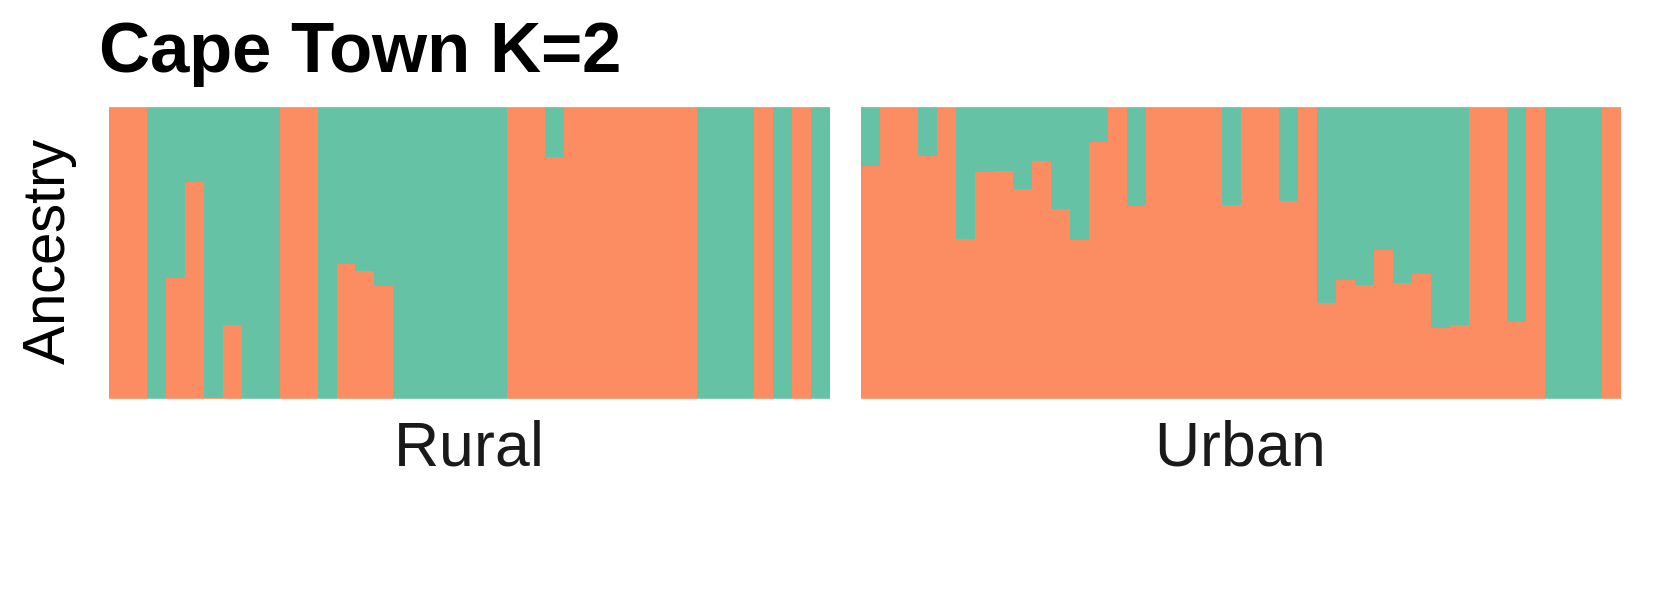

In [26]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Cape_Town_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))


kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Cape Town K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 


ggsave(
  "ADMIX_Cape_Town_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Cape_Town_K2.png"
display_png(file=path_to_kplot)

## Christchurch

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 9"

[1] 2

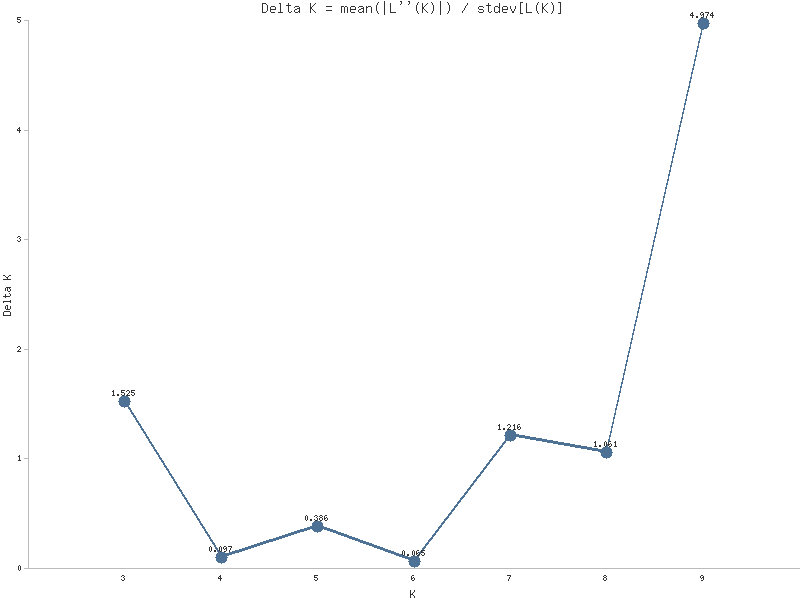

In [27]:
city <- 'Christchurch'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



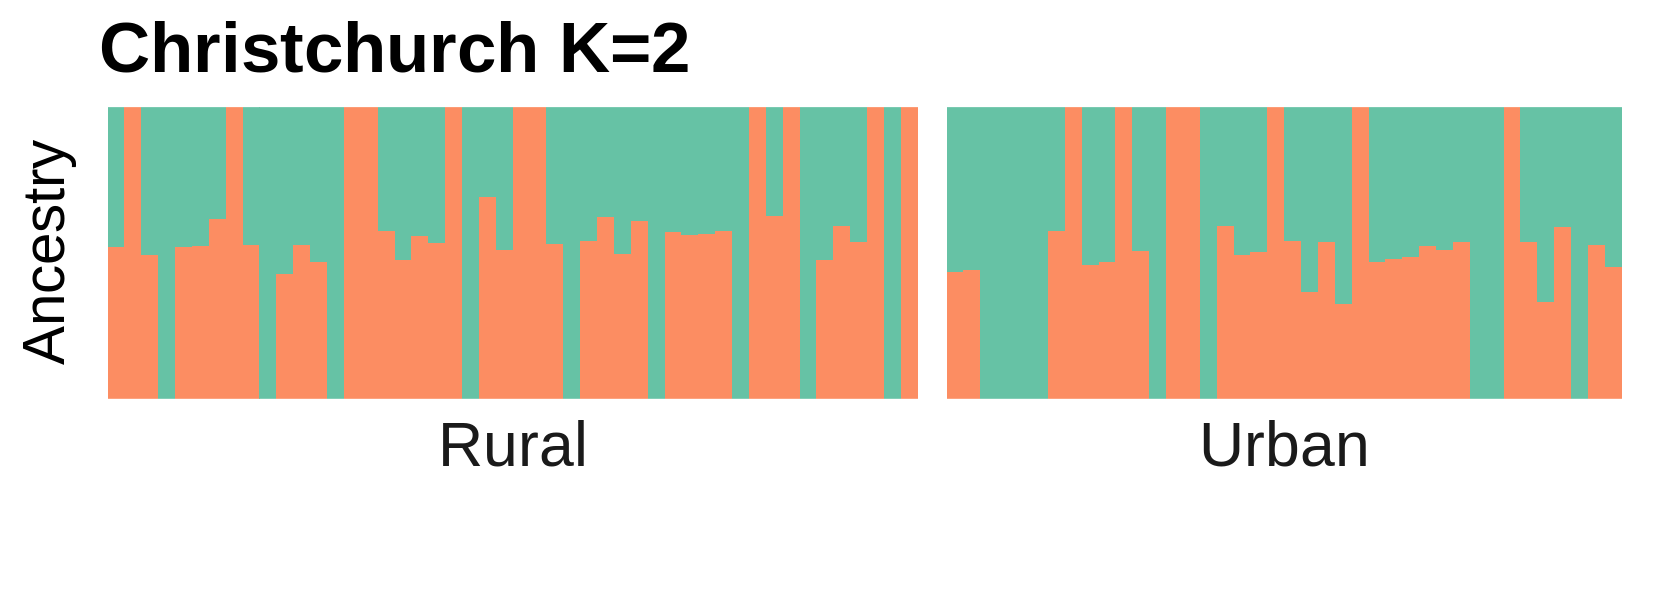

In [28]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Christchurch_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))


cols_admix <- c('#66C2A5','#FC8D62','#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#6A3D9A')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Christchurch K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
  scale_fill_manual(values = cols_admix) + 
  scale_color_manual(values = cols_admix) +
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
ggsave(
  "ADMIX_Christchurch_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Christchurch_K2.png"
display_png(file=path_to_kplot)

## Hiroshima

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

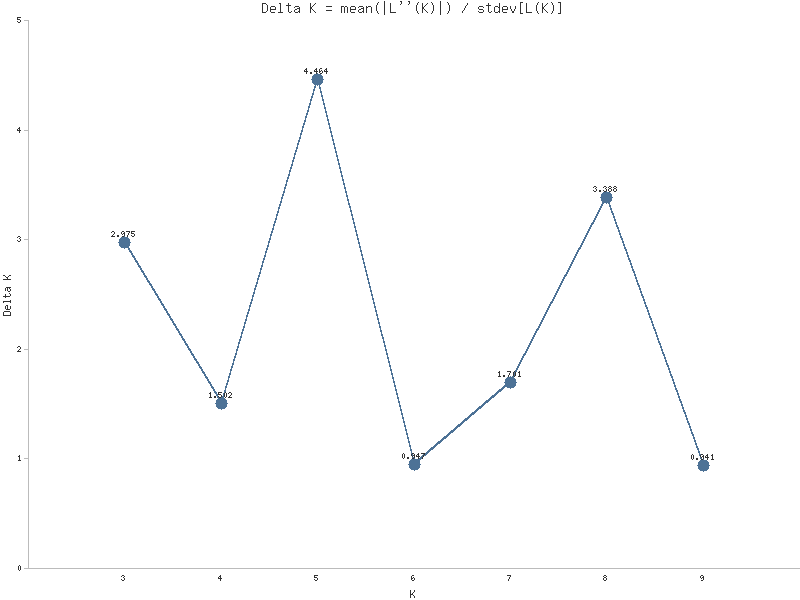

In [29]:
city <- 'Hiroshima'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



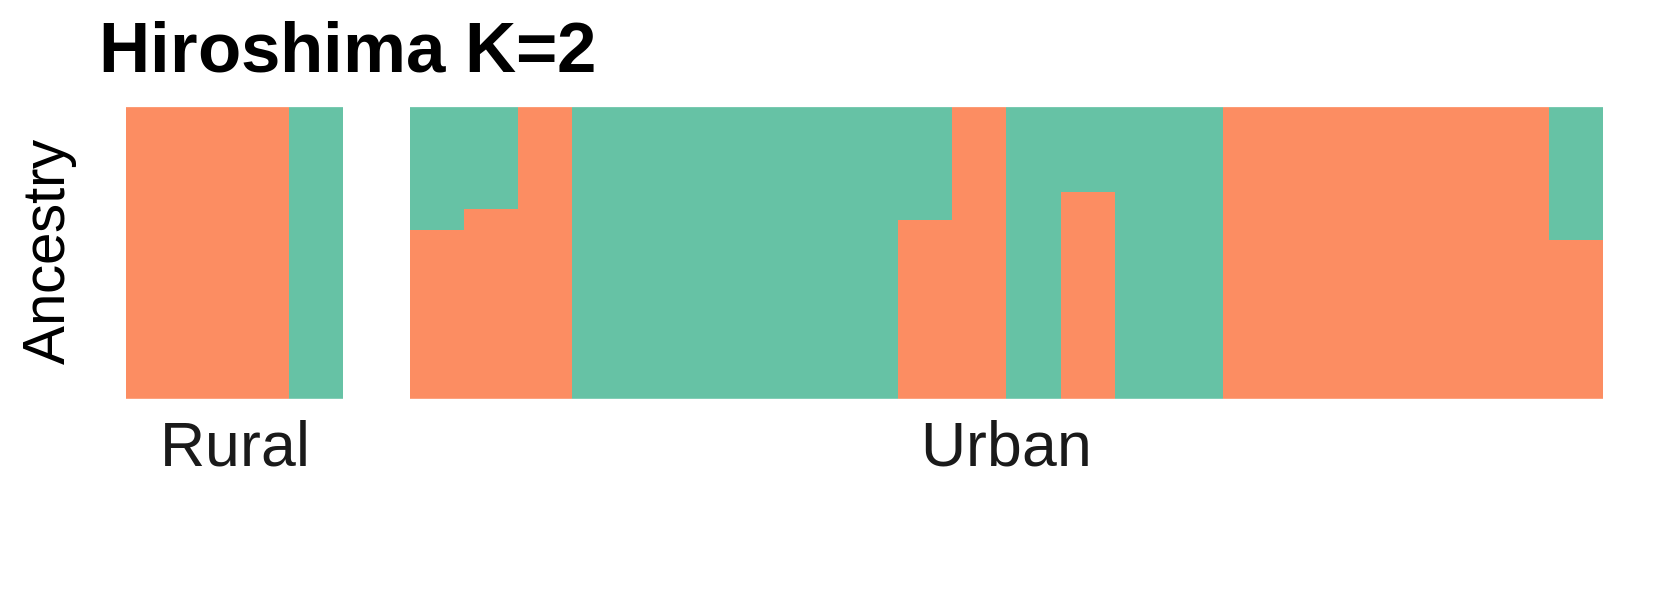

In [30]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Hiroshima_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Hiroshima K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  


ggsave(
  "ADMIX_Hiroshima_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Hiroshima_K2.png"
display_png(file=path_to_kplot)

## Kunming

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

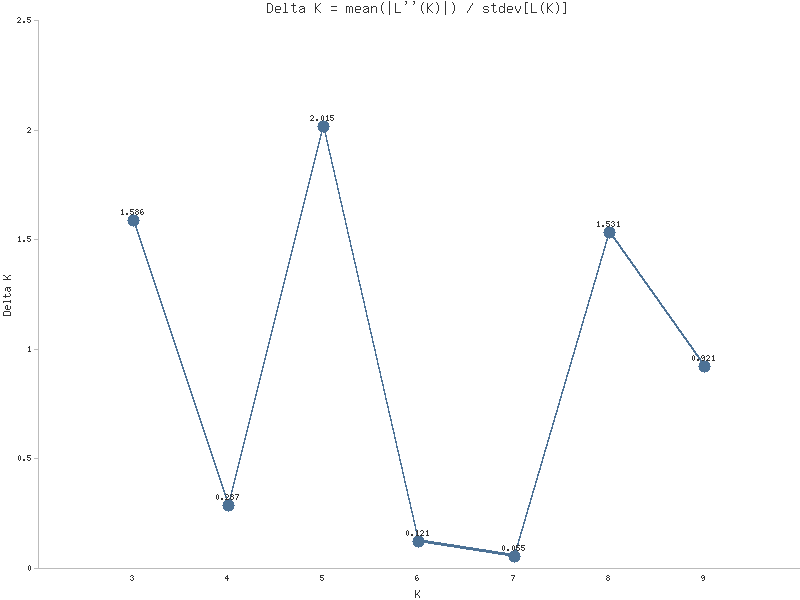

In [31]:
city <- 'Kunming'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



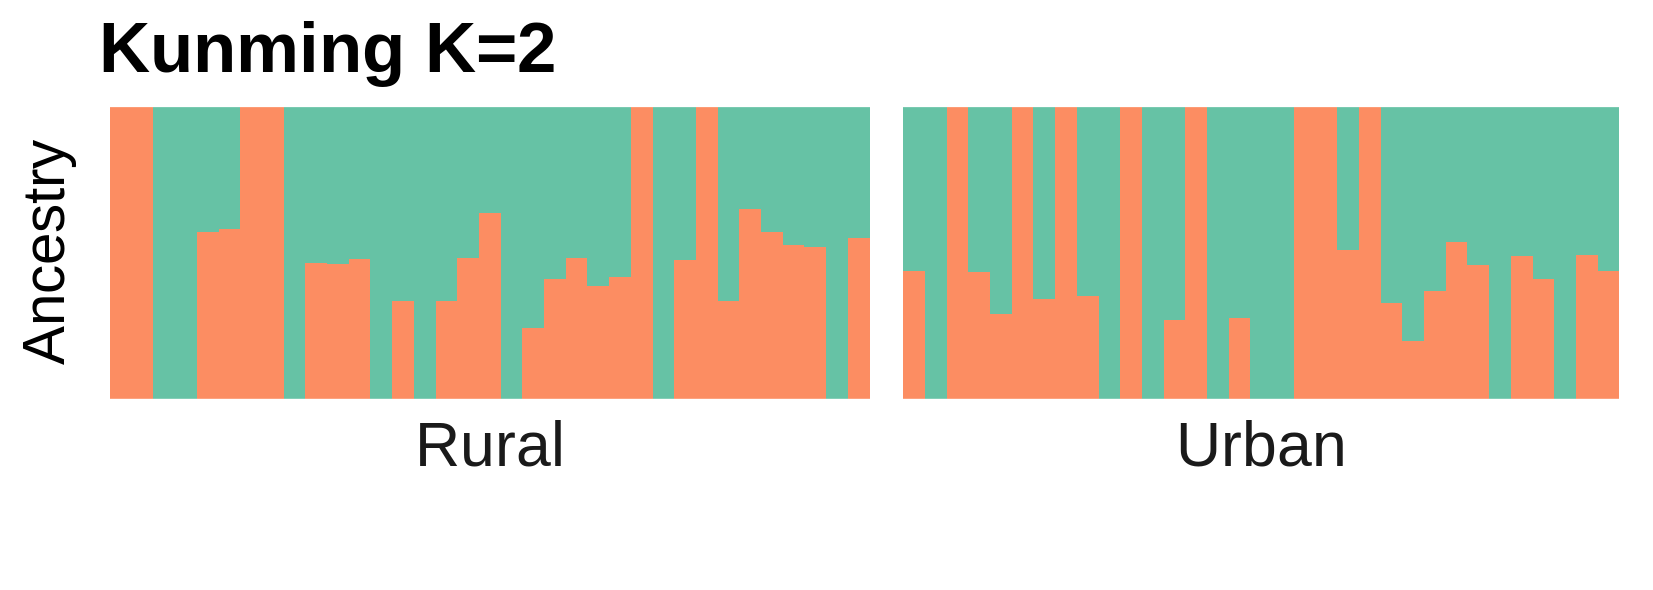

In [32]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Kunming_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Kunming K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  


ggsave(
  "ADMIX_Kunming_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Kunming_K2.png"
display_png(file=path_to_kplot)

## Kyoto

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 3"

[1] 2

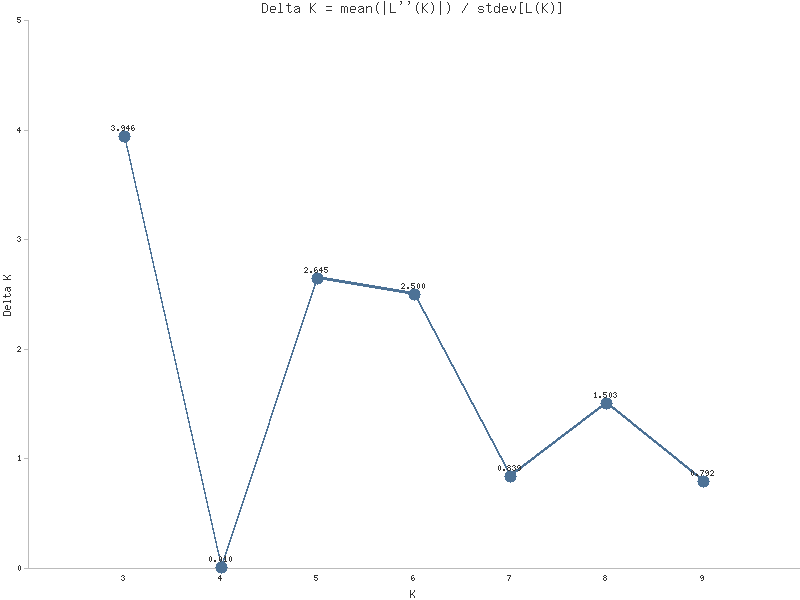

In [33]:
city <- 'Kyoto'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Kyoto_22_3,ASI,Kyoto,22,3,Rural,Introduced,glue_low1,1,X1,0
Kyoto_22_3,ASI,Kyoto,22,3,Rural,Introduced,glue_low1,1,X2,1
Kyoto_24_6,ASI,Kyoto,24,6,Rural,Introduced,glue_low1,1,X1,0
Kyoto_24_6,ASI,Kyoto,24,6,Rural,Introduced,glue_low1,1,X2,1
Kyoto_1_7,ASI,Kyoto,1,7,Urban,Introduced,glue_low1,1,X1,1
Kyoto_1_7,ASI,Kyoto,1,7,Urban,Introduced,glue_low1,1,X2,0


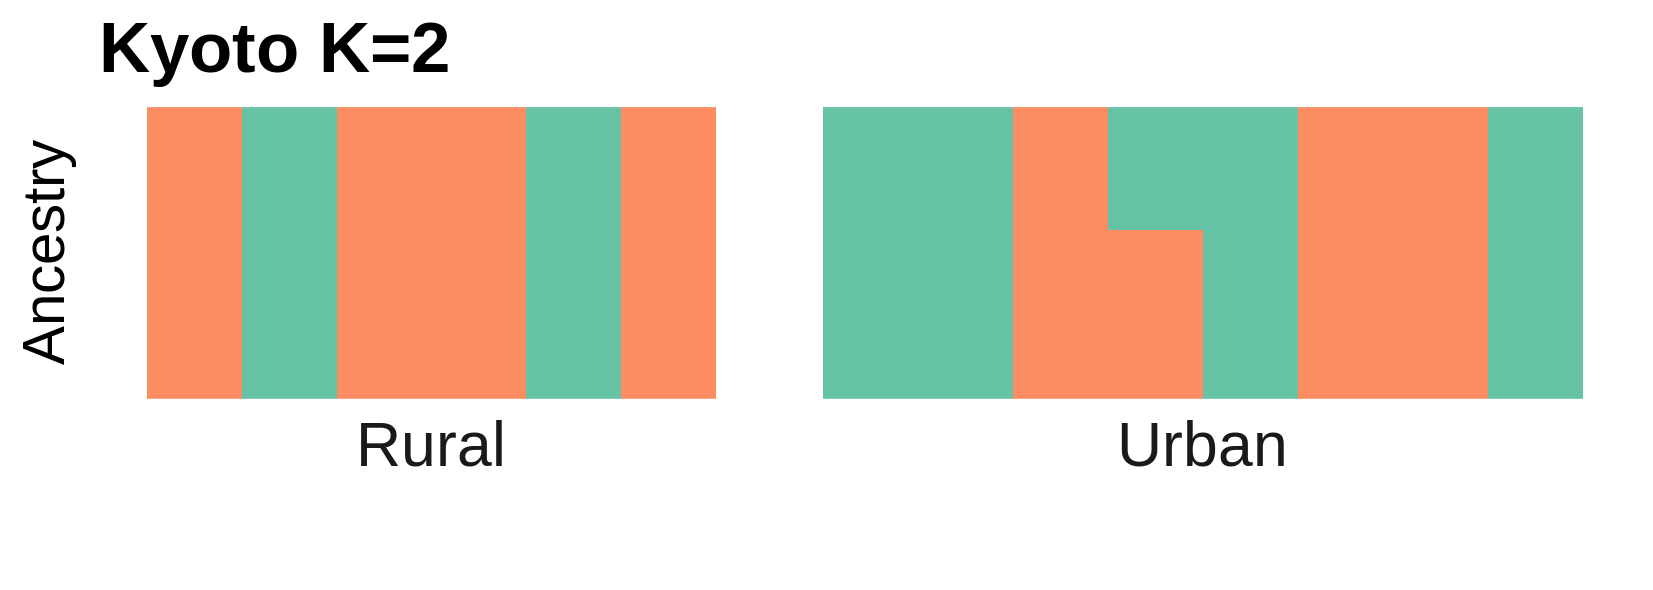

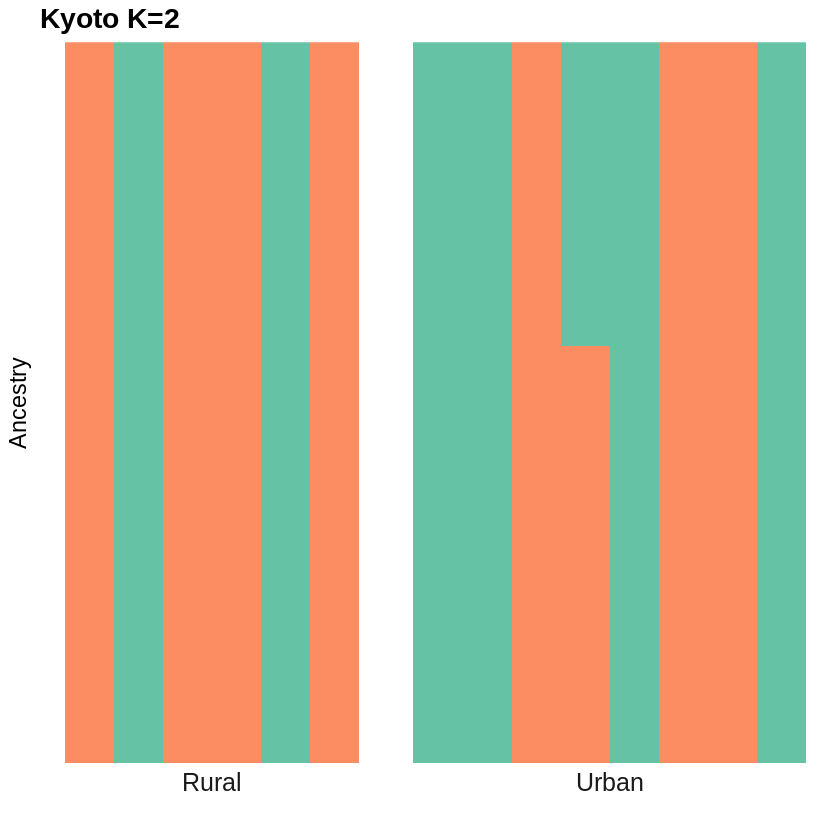

In [34]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Kyoto_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Kyoto K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Kyoto_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Kyoto_K2.png"
display_png(file=path_to_kplot)

## Landshut

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

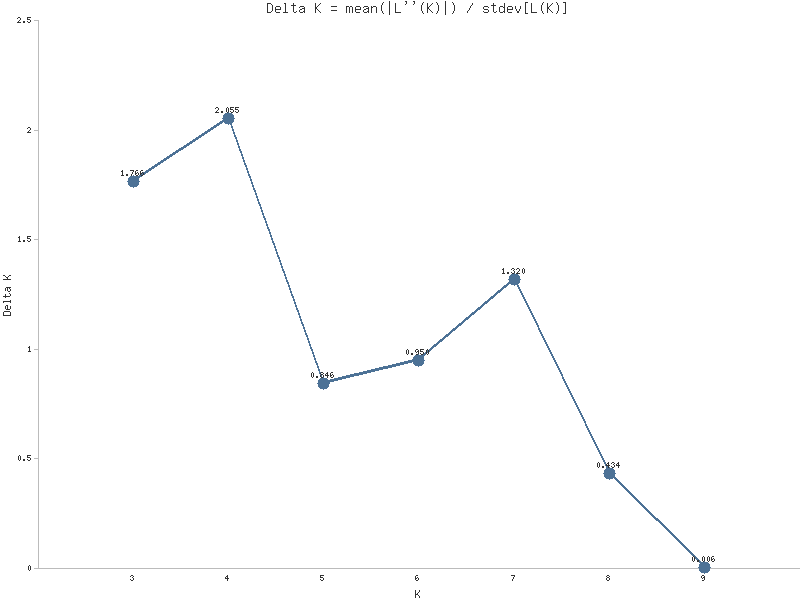

In [35]:
city <- 'Landshut'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Landshut_1_1,EU,Landshut,1,1,Rural,Native,glue_low1,1,X1,0.64444
Landshut_1_1,EU,Landshut,1,1,Rural,Native,glue_low1,1,X2,0.35556
Landshut_1_18,EU,Landshut,1,18,Rural,Native,glue_low1,1,X1,1.00000
Landshut_1_18,EU,Landshut,1,18,Rural,Native,glue_low1,1,X2,0.00000
Landshut_2_8,EU,Landshut,2,8,Rural,Native,glue_low1,1,X1,0.44306
Landshut_2_8,EU,Landshut,2,8,Rural,Native,glue_low1,1,X2,0.55694


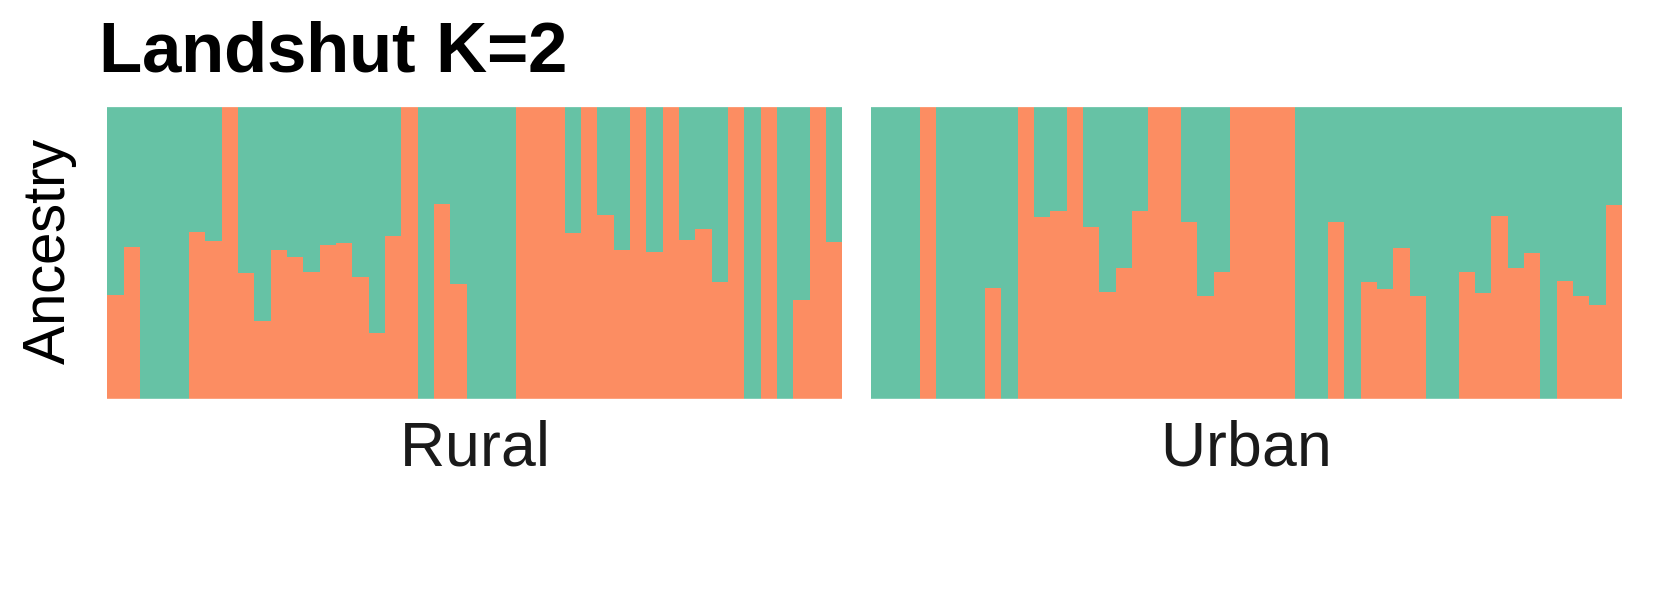

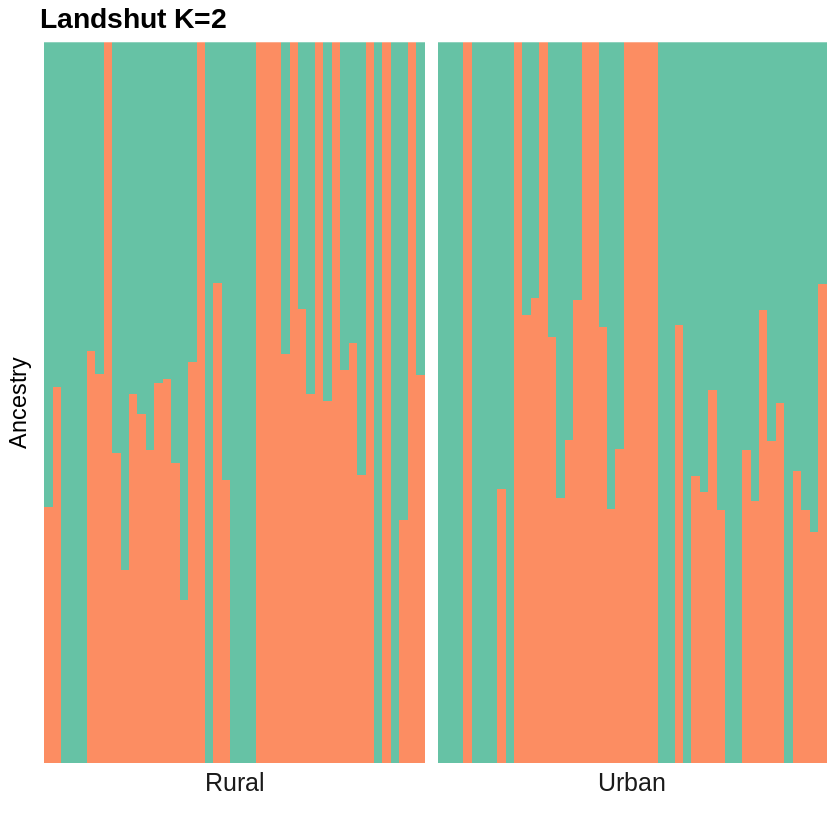

In [36]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Landshut_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Landshut K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Landshut_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Landshut_K2.png"
display_png(file=path_to_kplot)

## Linkoping

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 3"

[1] 2

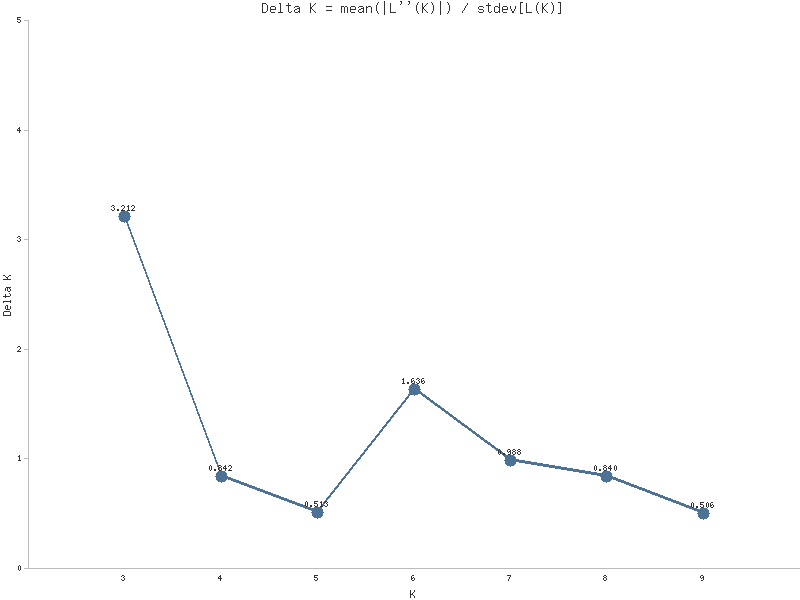

In [37]:
city <- 'Linkoping'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Linkoping_25_9,EU,Linkoping,25,9,Rural,Native,glue_low1,1,X1,0.46374
Linkoping_25_9,EU,Linkoping,25,9,Rural,Native,glue_low1,1,X2,0.53626
Linkoping_25_7,EU,Linkoping,25,7,Rural,Native,glue_low1,1,X1,0.57093
Linkoping_25_7,EU,Linkoping,25,7,Rural,Native,glue_low1,1,X2,0.42907
Linkoping_27_8,EU,Linkoping,27,8,Rural,Native,glue_low1,1,X1,0.00000
Linkoping_27_8,EU,Linkoping,27,8,Rural,Native,glue_low1,1,X2,1.00000


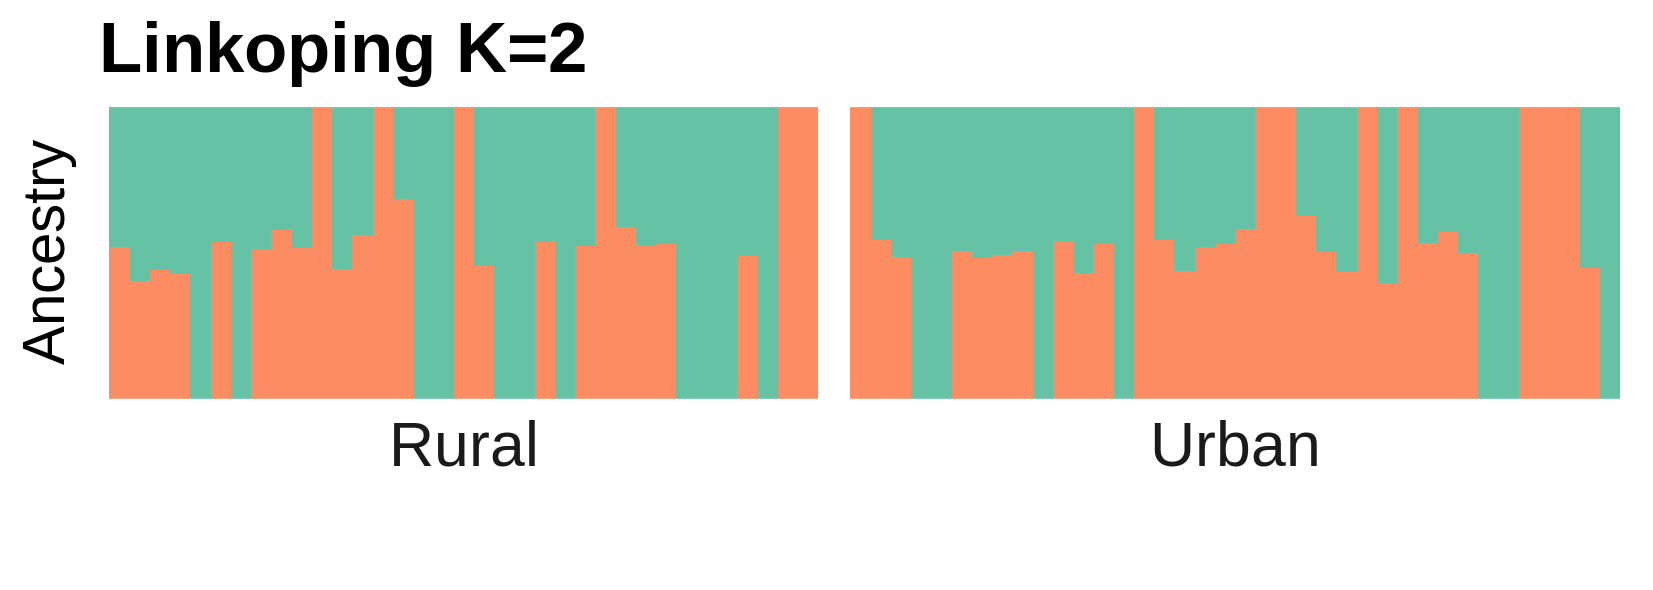

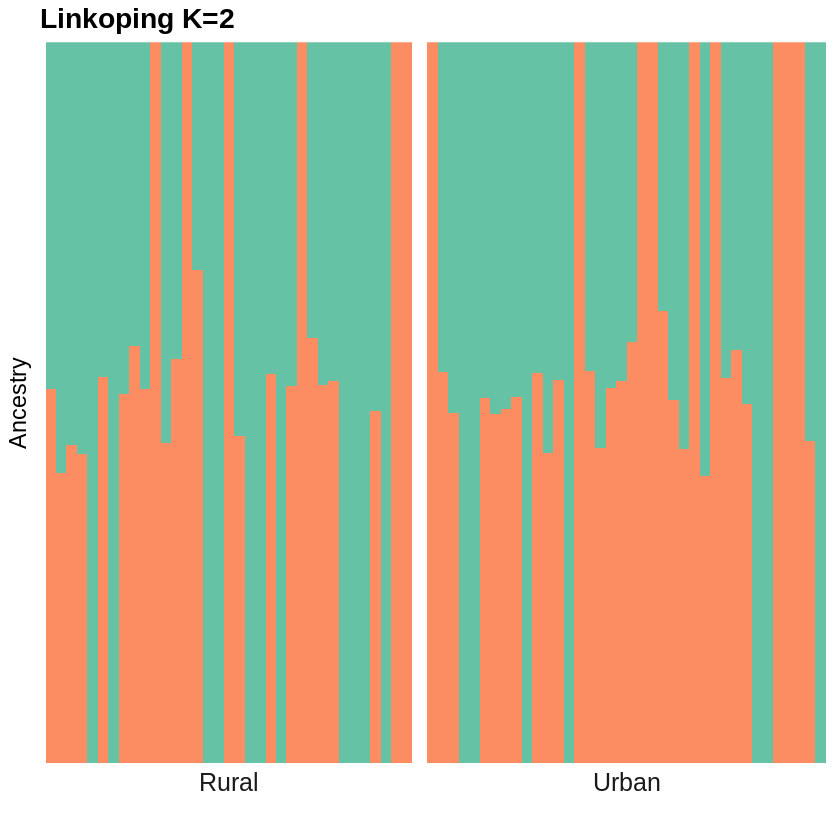

In [38]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Linkoping_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Linkoping K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Linkoping_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Linkoping_K2.png"
display_png(file=path_to_kplot)

## Loja

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

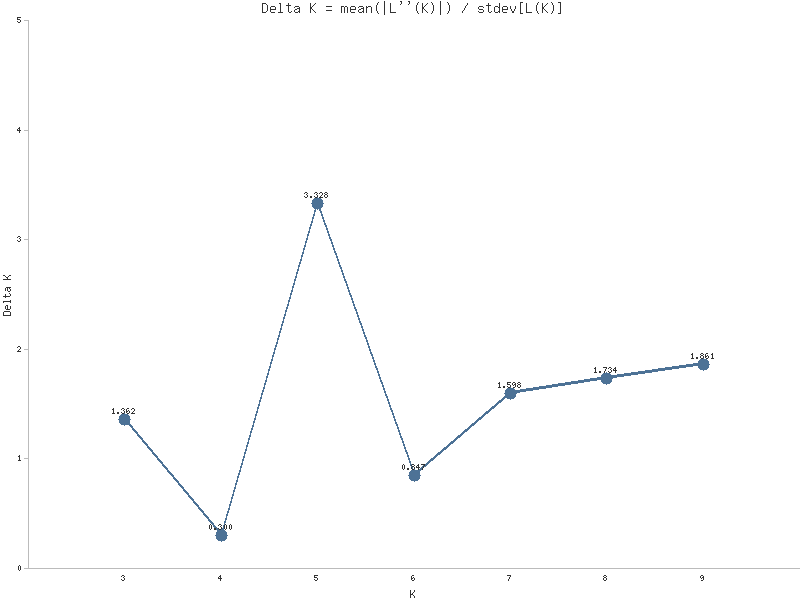

In [39]:
city <- 'Loja'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Loja_1_19,SAM,Loja,1,19,Rural,Introduced,glue_low1,1,X1,1.00000
Loja_1_19,SAM,Loja,1,19,Rural,Introduced,glue_low1,1,X2,0.00000
Loja_1_7,SAM,Loja,1,7,Rural,Introduced,glue_low1,1,X1,0.51910
Loja_1_7,SAM,Loja,1,7,Rural,Introduced,glue_low1,1,X2,0.48090
Loja_2_10,SAM,Loja,2,10,Rural,Introduced,glue_low1,1,X1,0.55801
Loja_2_10,SAM,Loja,2,10,Rural,Introduced,glue_low1,1,X2,0.44199


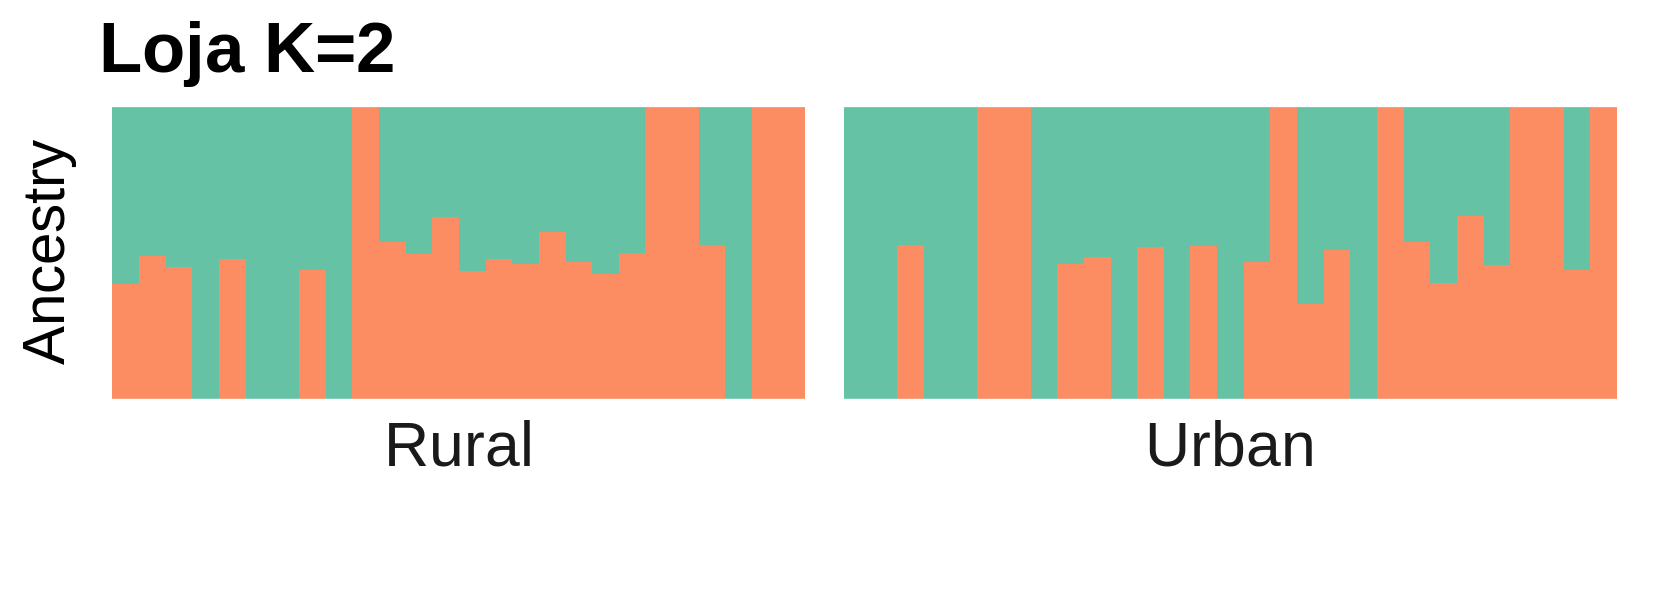

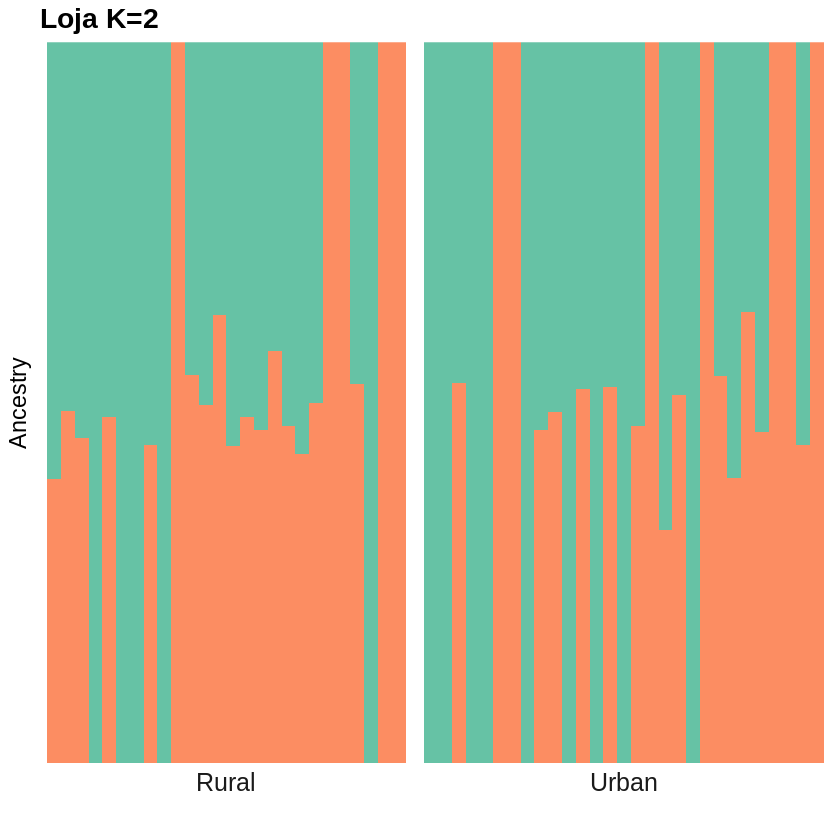

In [40]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Loja_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Loja K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Loja_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Loja_K2.png"
display_png(file=path_to_kplot)

## Medellin

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

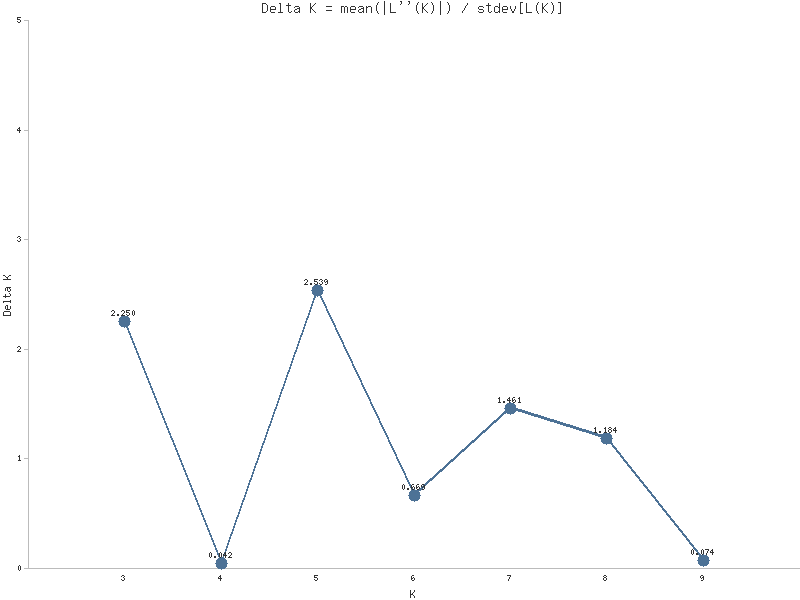

In [41]:
city <- 'Medellin'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



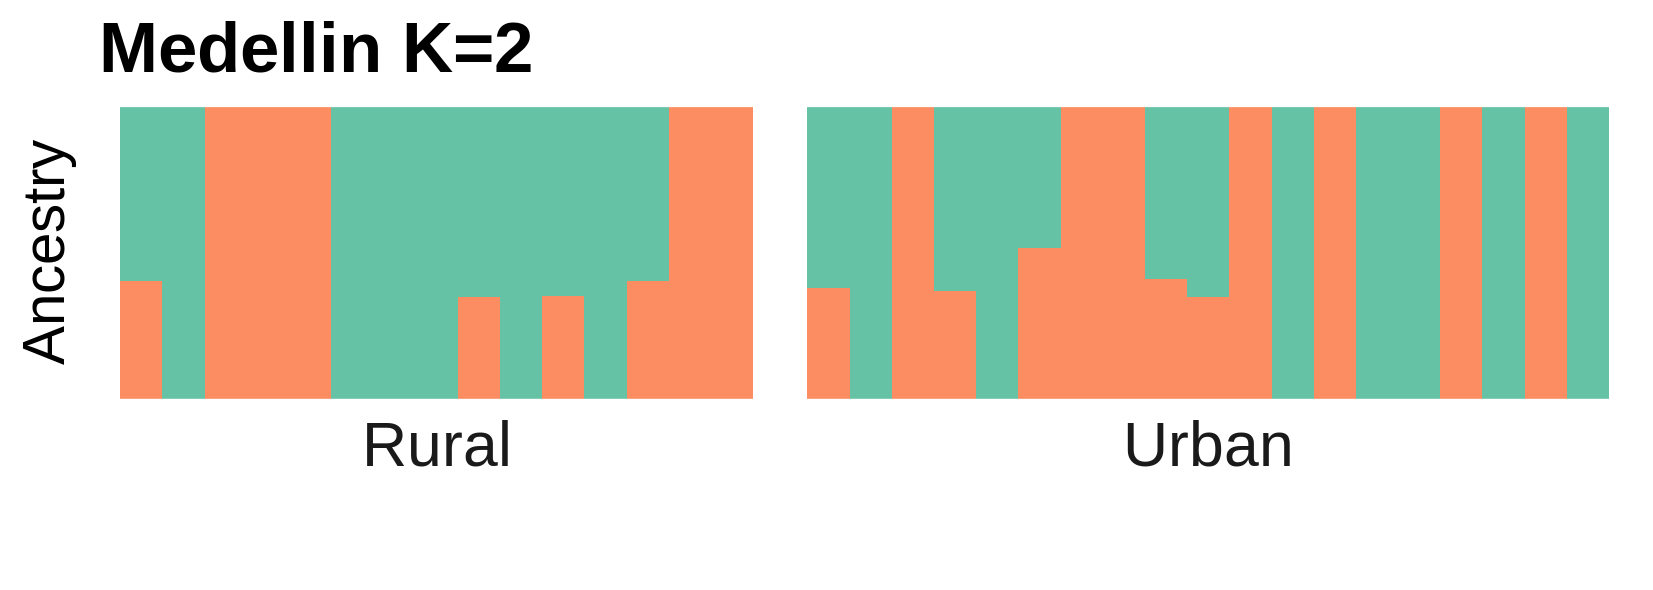

In [42]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Medellin_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Medellin K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  

ggsave(
  "ADMIX_Medellin_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Medellin_K2.png"
display_png(file=path_to_kplot)

## Melbourne

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 9"

[1] 2

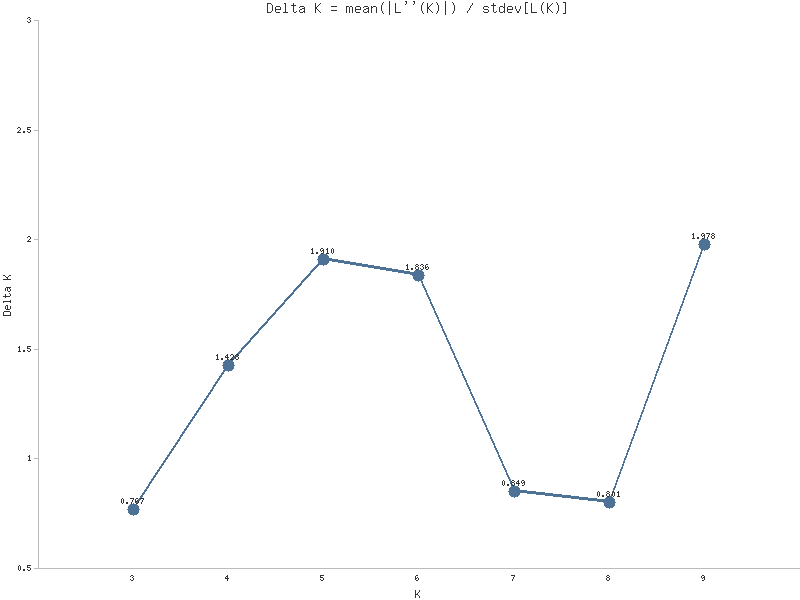

In [43]:
city <- 'Melbourne'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



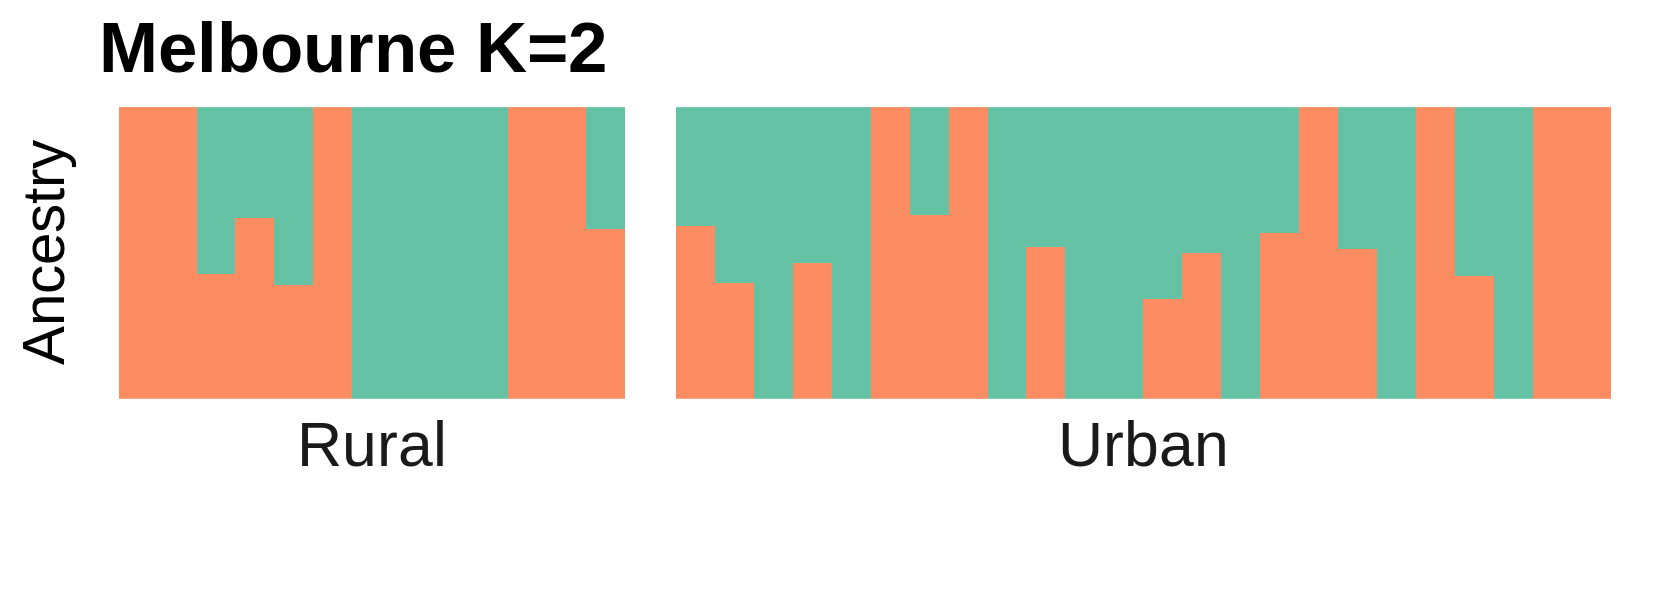

In [44]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Melbourne_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

cols_admix <- c('#66C2A5','#FC8D62','#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#6A3D9A')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Melbourne K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
  scale_fill_manual(values = cols_admix) + 
  scale_color_manual(values = cols_admix) +
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 

ggsave(
  "ADMIX_Melbourne_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Melbourne_K2.png"
display_png(file=path_to_kplot)

## Memphis

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

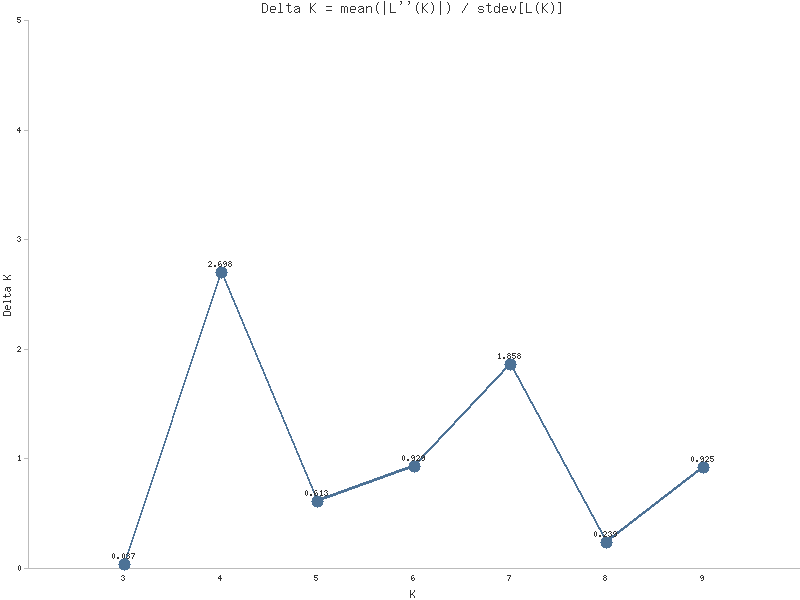

In [45]:
city <- 'Memphis'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



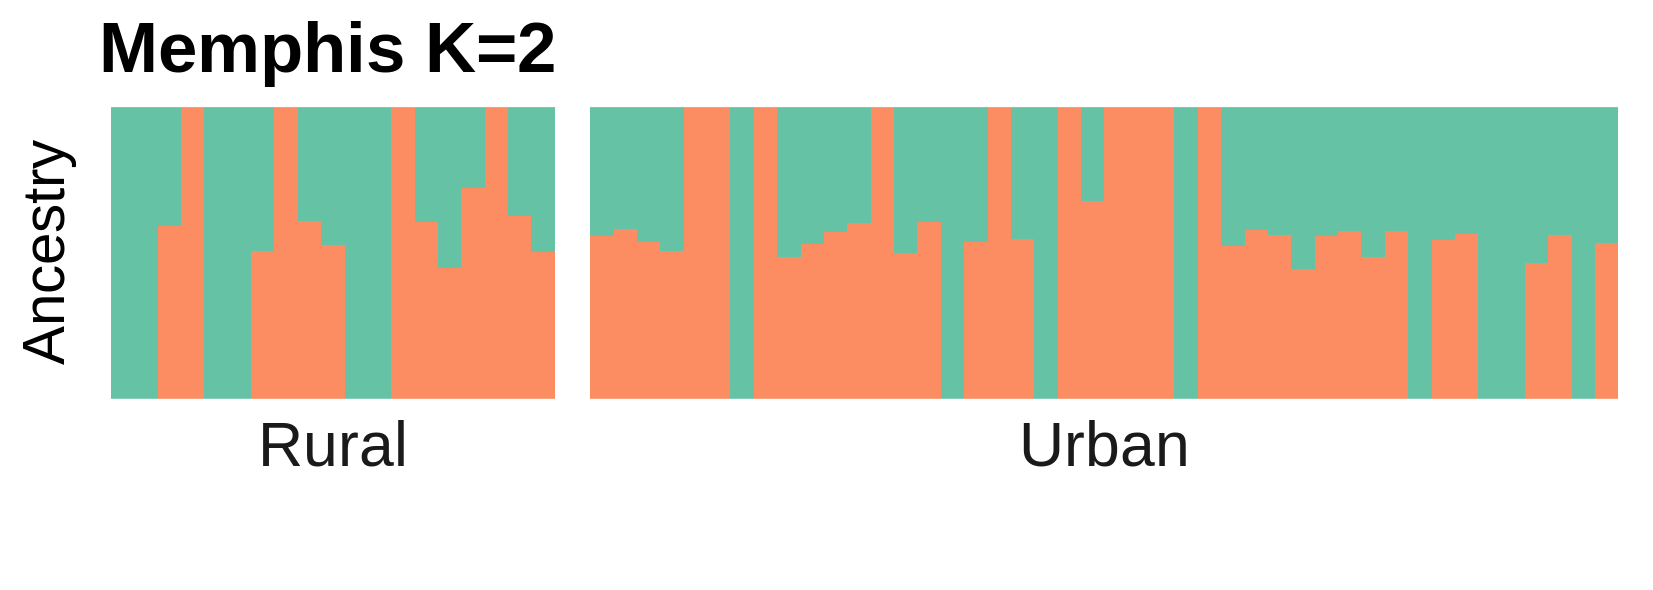

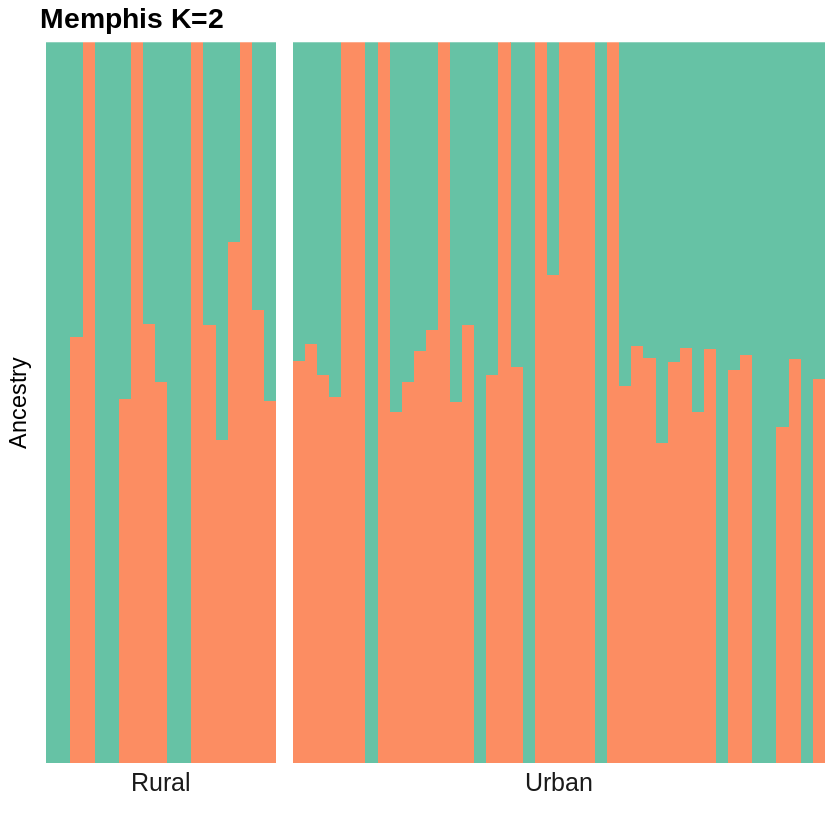

In [46]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Memphis_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Memphis K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Memphis_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Memphis_K2.png"
display_png(file=path_to_kplot)

## Mexico_City

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 3"

[1] 2

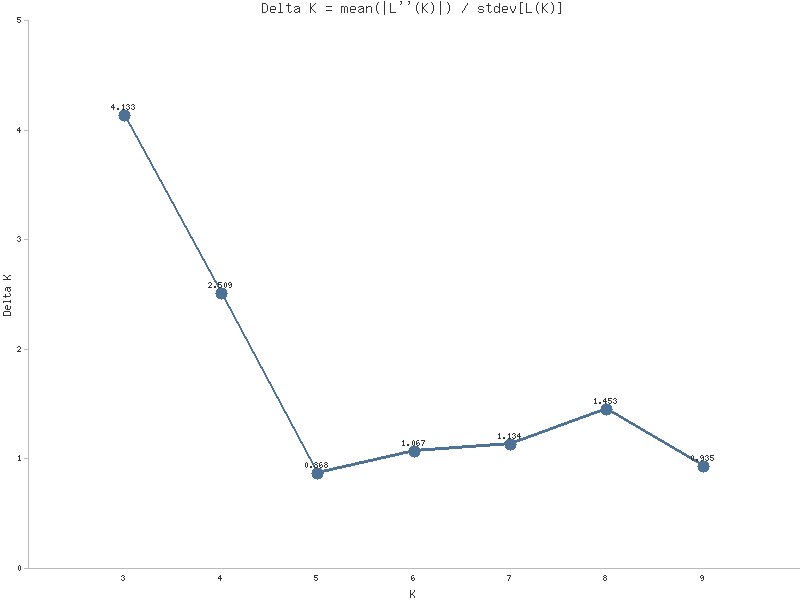

In [47]:
city <- 'Mexico_City'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



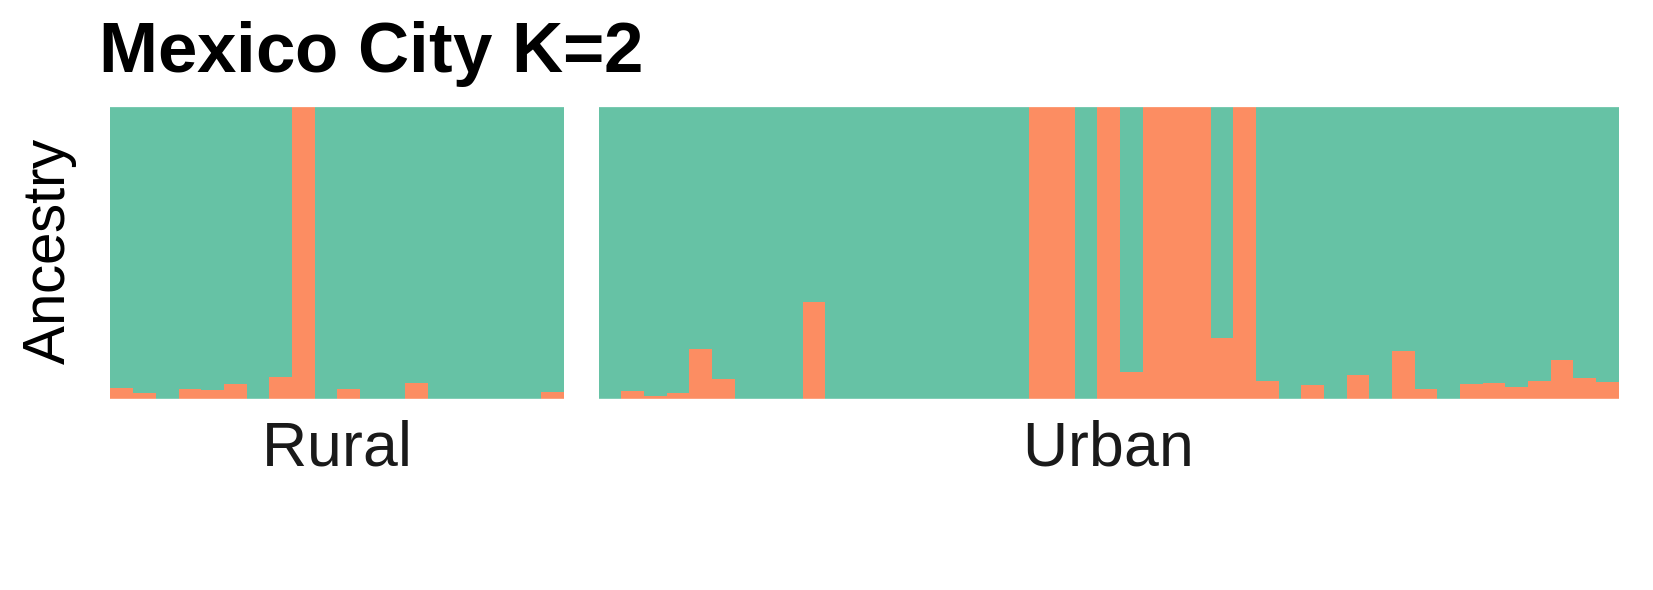

In [48]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Mexico_City_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Mexico City K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 


ggsave(
  "ADMIX_Mexico_City_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Mexico_City_K2.png"
display_png(file=path_to_kplot)

## Munich

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 3"

[1] 2

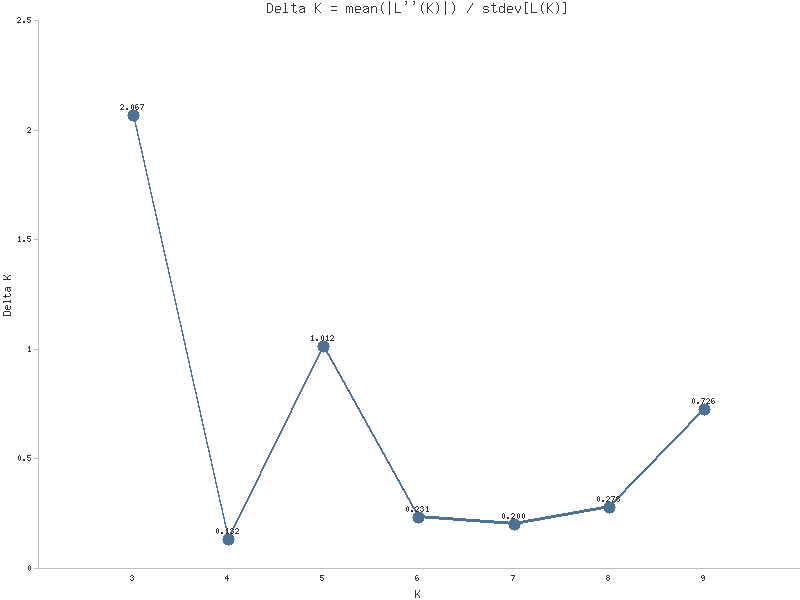

In [49]:
city <- 'Munich'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



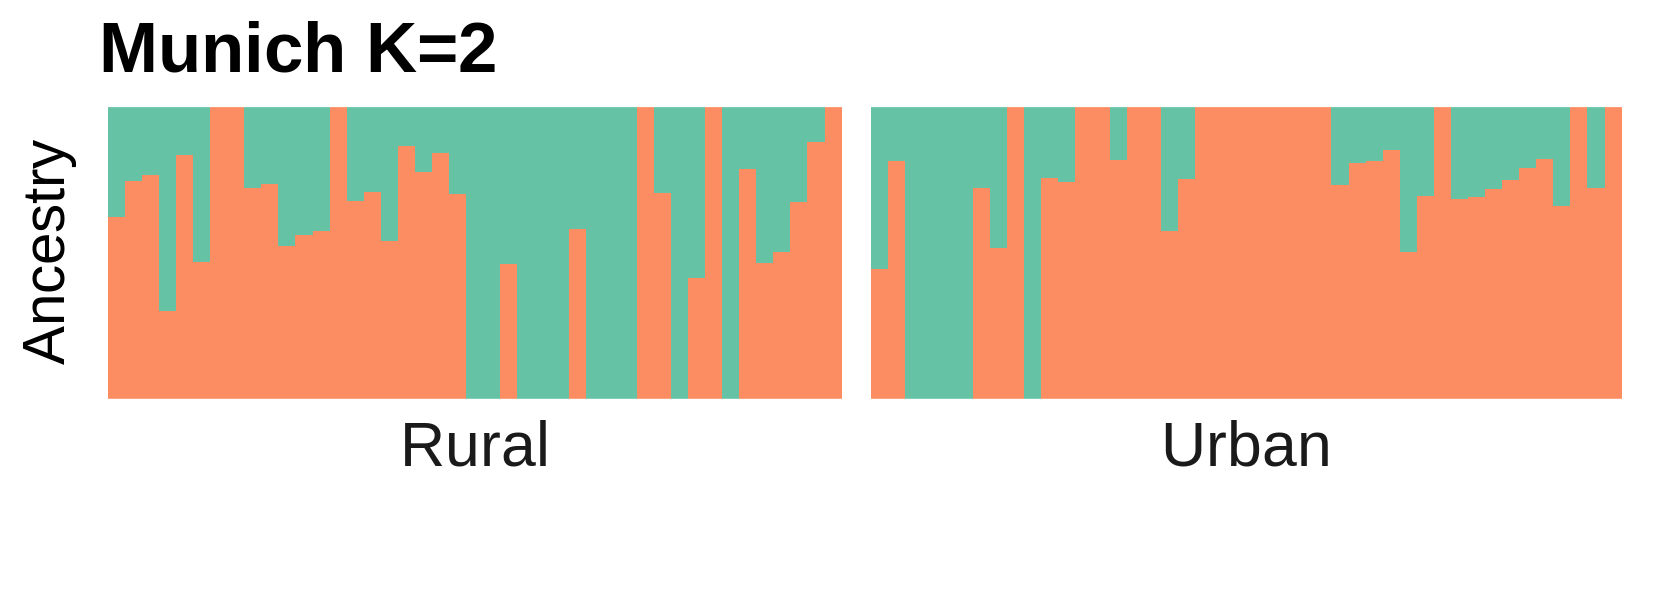

In [50]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Munich_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Munich K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
ggsave(
  "ADMIX_Munich_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Munich_K2.png"
display_png(file=path_to_kplot)

## Paris

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

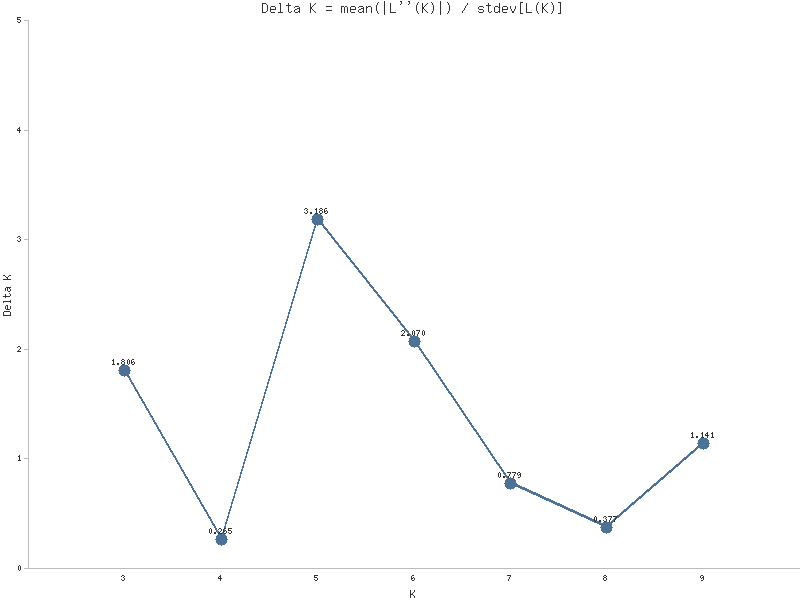

In [51]:
city <- 'Paris'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Paris_11_9,EU,Paris,11,9,Rural,Native,glue_low1,1,X1,1.00000
Paris_11_9,EU,Paris,11,9,Rural,Native,glue_low1,1,X2,0.00000
Paris_11_6,EU,Paris,11,6,Rural,Native,glue_low1,1,X1,0.63151
Paris_11_6,EU,Paris,11,6,Rural,Native,glue_low1,1,X2,0.36849
Paris_13_3,EU,Paris,13,3,Rural,Native,glue_low1,1,X1,0.56387
Paris_13_3,EU,Paris,13,3,Rural,Native,glue_low1,1,X2,0.43613


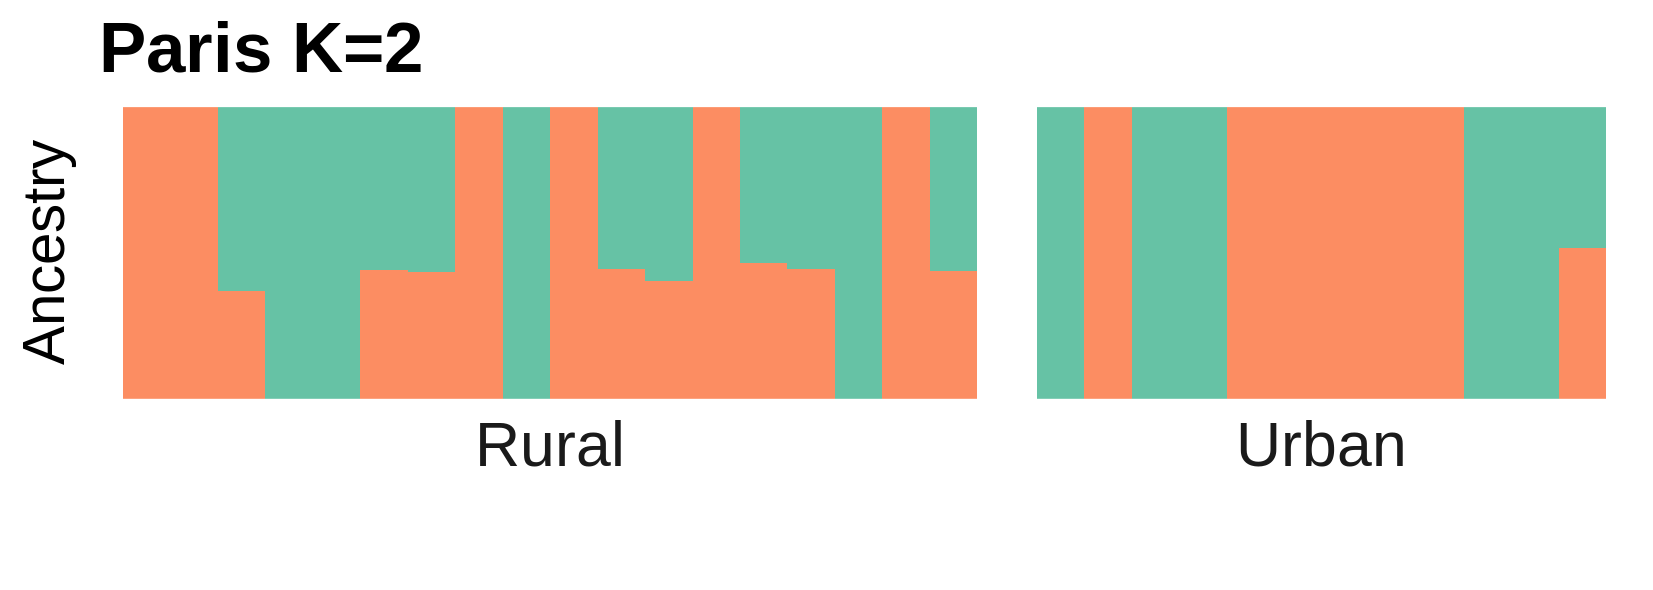

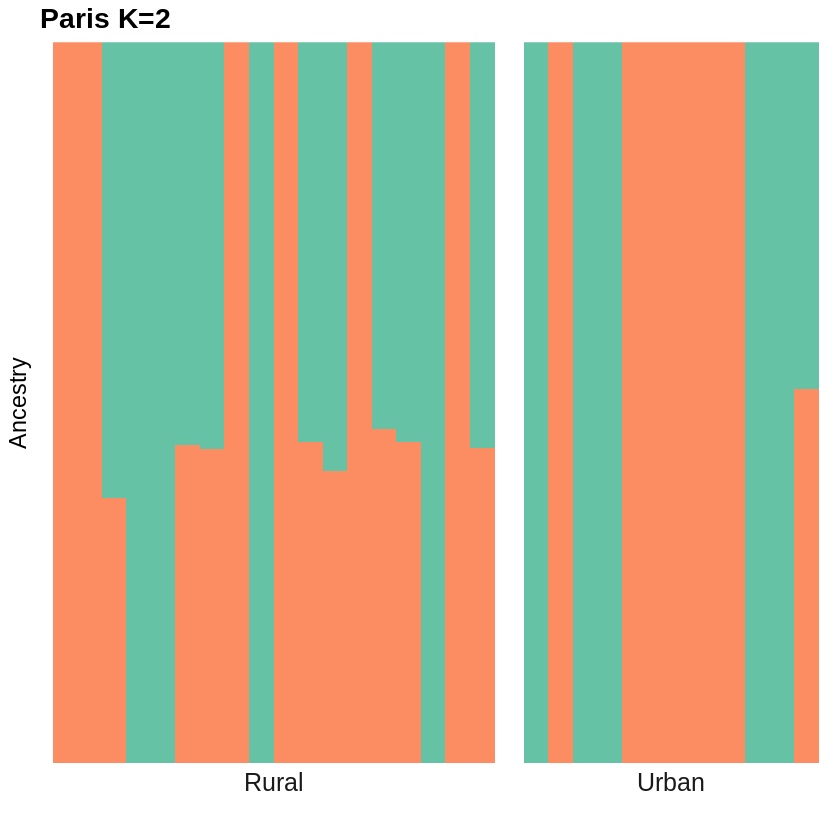

In [52]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Paris_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Paris K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Paris_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Paris_K2.png"
display_png(file=path_to_kplot)

## Quito

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 7"

[1] 2

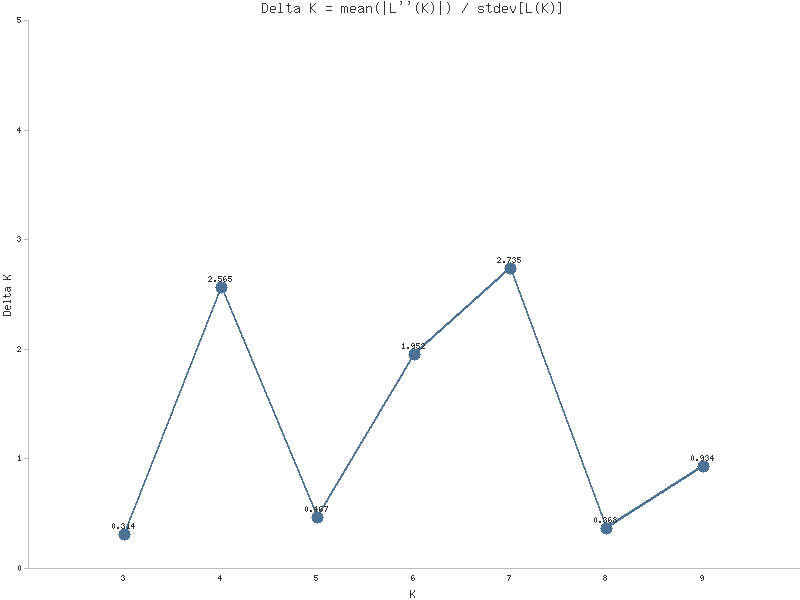

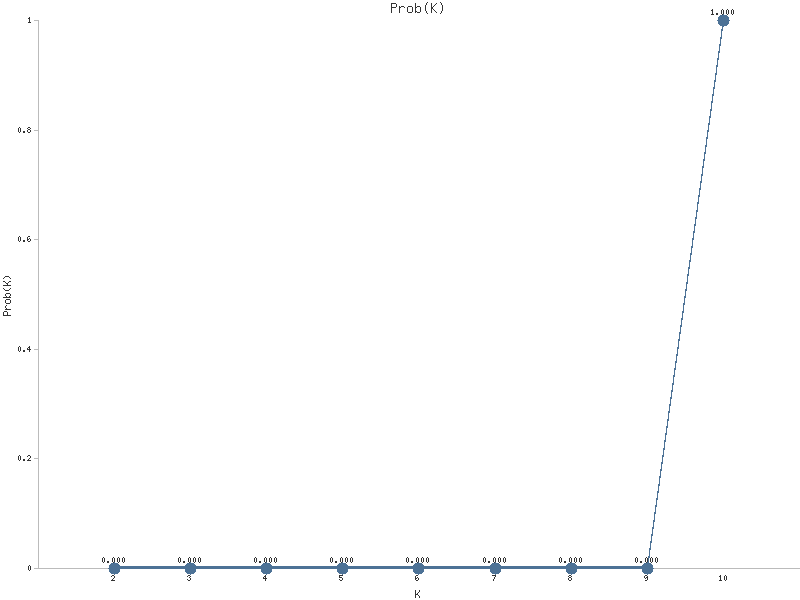

In [61]:
city <- 'Quito'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)


# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



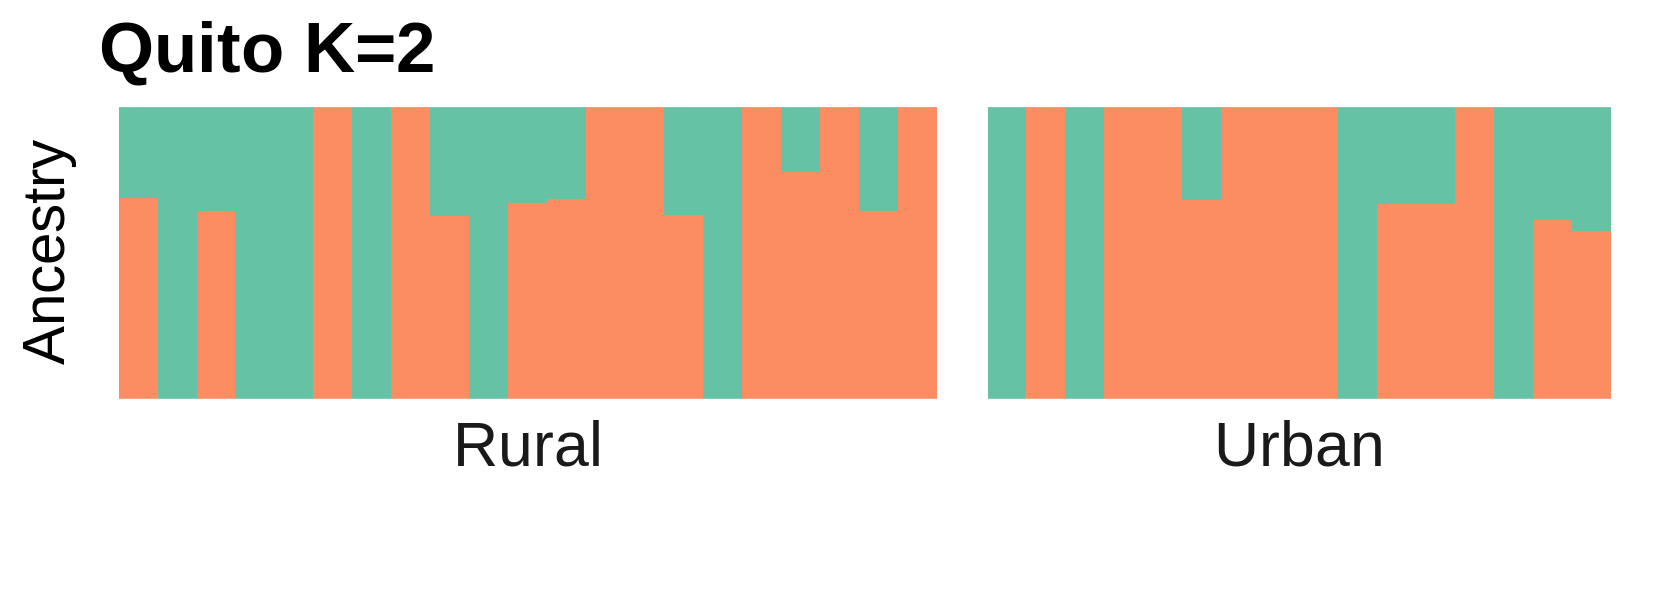

In [62]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Quito_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Quito K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 


ggsave(
  "ADMIX_Quito_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Quito_K2.png"
display_png(file=path_to_kplot)

## Tehran

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 5"

[1] 2

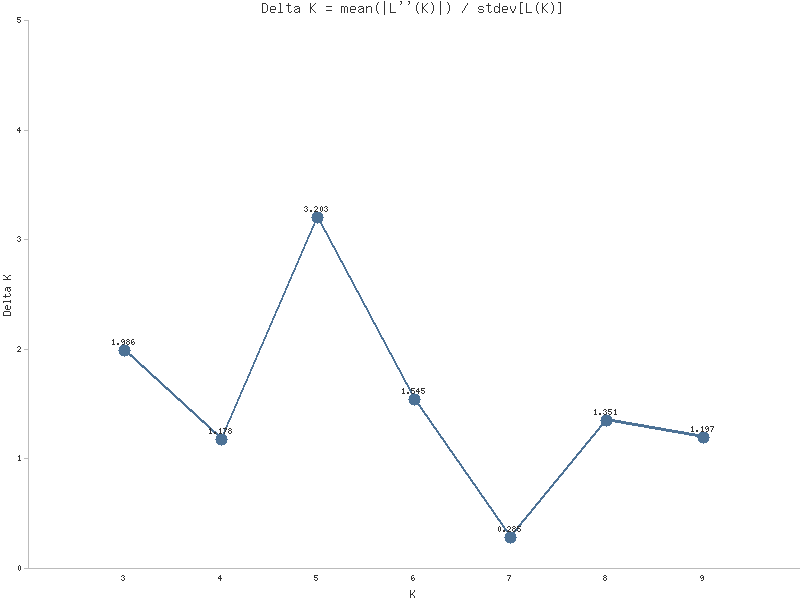

In [55]:
city <- 'Tehran'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



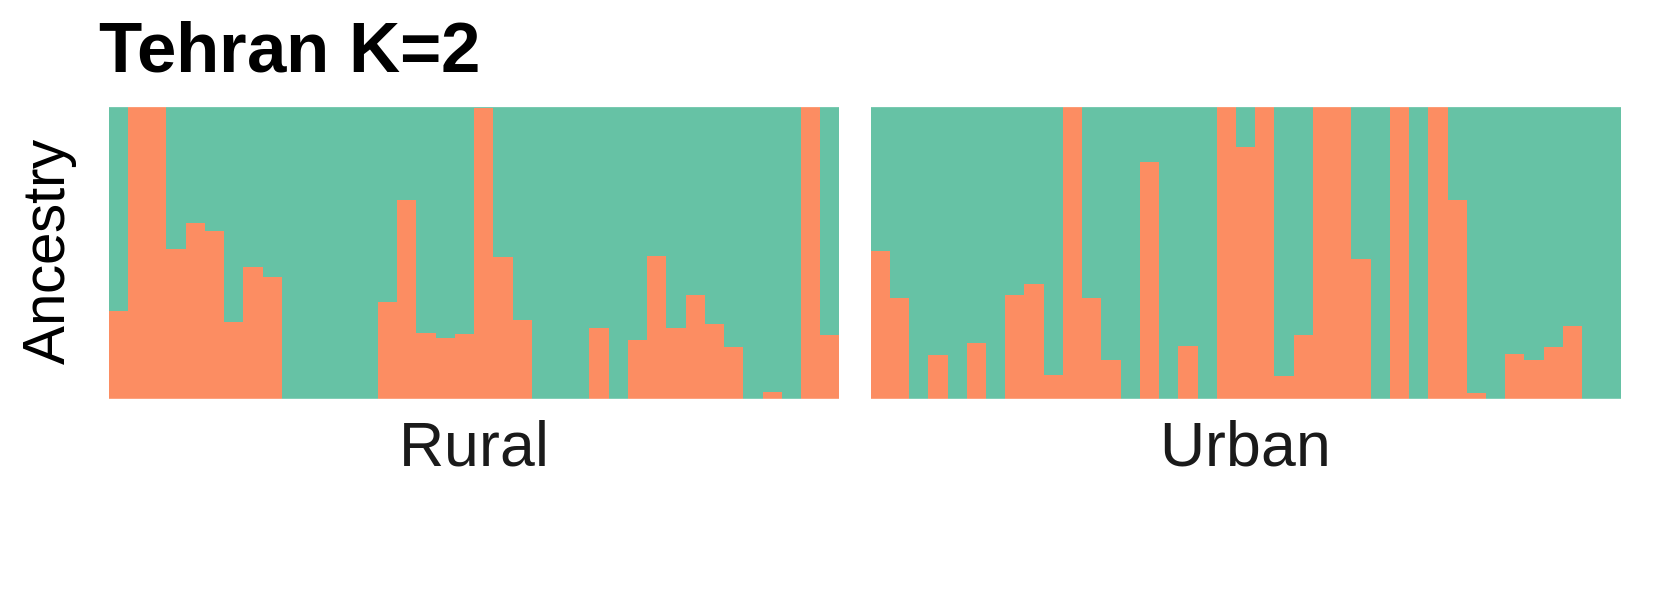

In [56]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Tehran_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))


kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Tehran K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 

ggsave(
  "ADMIX_Tehran_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Tehran_K2.png"
display_png(file=path_to_kplot)

## Thessaloniki

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 4"

[1] 2

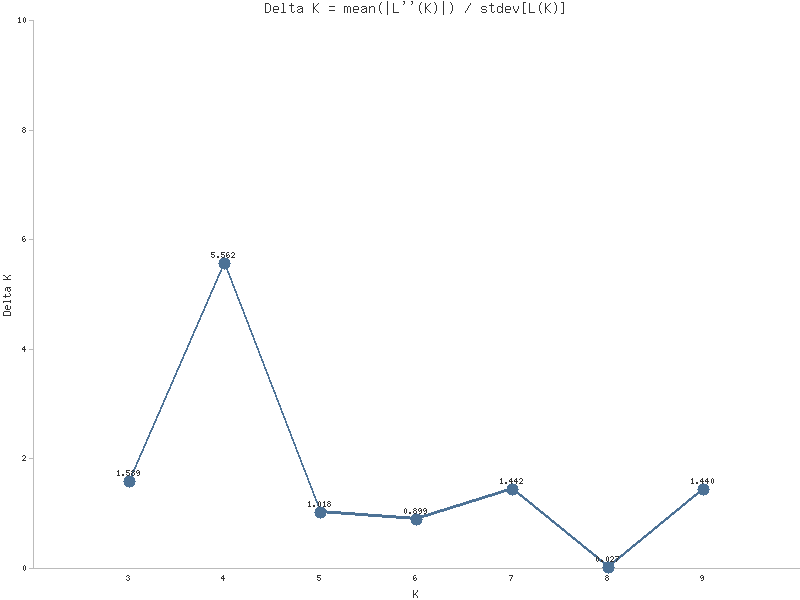

In [57]:
city <- 'Thessaloniki'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



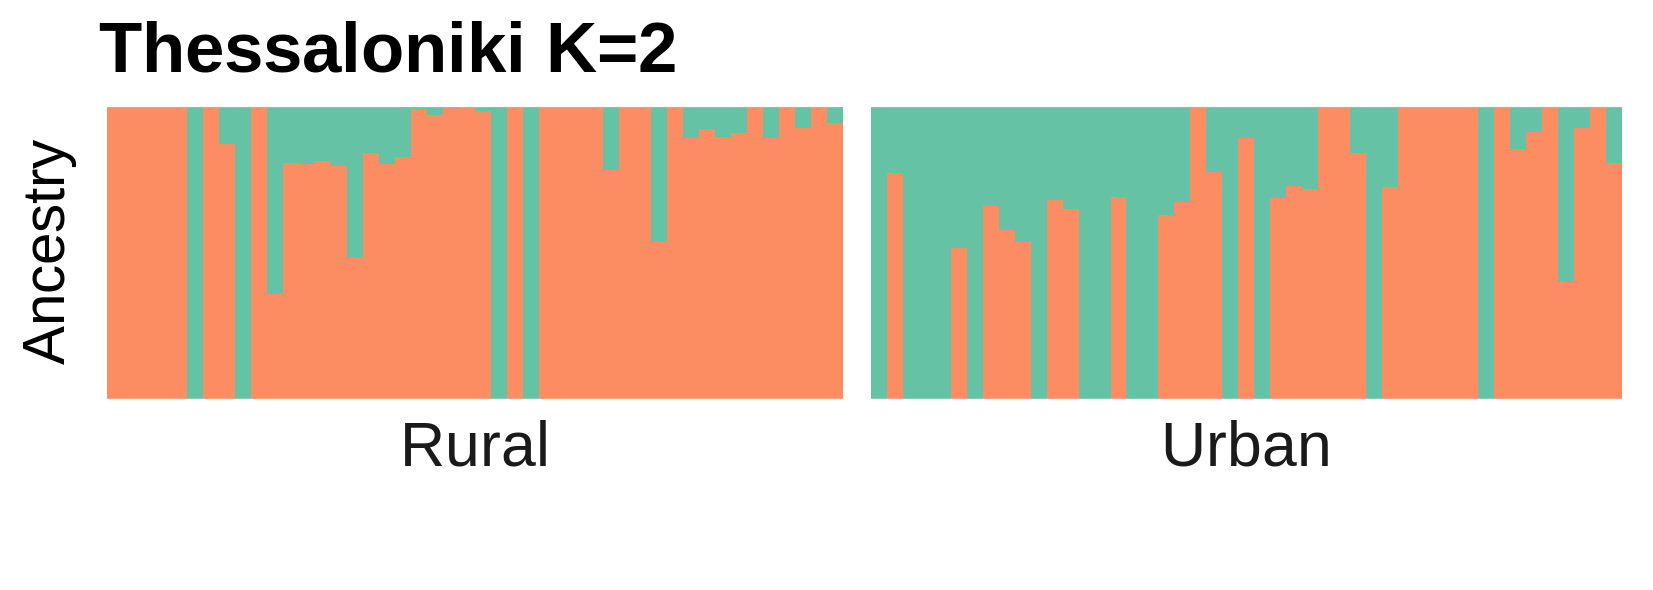

In [58]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Thessaloniki_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Thessaloniki K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 

ggsave(
  "ADMIX_Thessaloniki_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Thessaloniki_K2.png"
display_png(file=path_to_kplot)

## Toronto

[1] "Tue Jul 19 11:20:28 2022: Optimal K by Evanno is: 3"

[1] 2

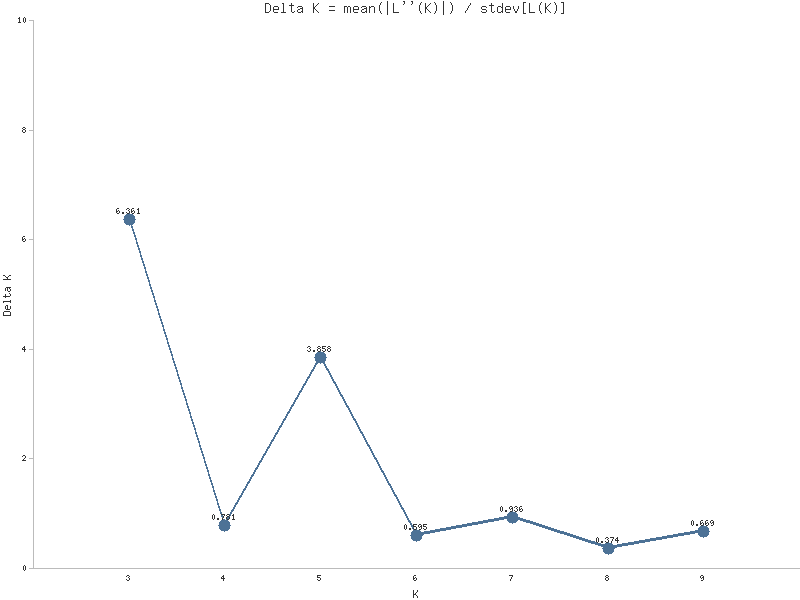

In [59]:
city <- 'Toronto'

# Best K by Evanno
clumpak_log_path <- paste0(results_prefix, 'population_structure/bestKbyEvanno/',city,'/output.log')
clumpak_log <- readLines(clumpak_log_path)
optimal_K <- clumpak_log[grep('Optimal K', clumpak_log)]
optimal_K
split<-strsplit(optimal_K, split = " ")
bestK<-2
bestK

# Plot K
path_to_file<-paste0(results_prefix,'population_structure/bestKbyEvanno/',city,'/Best_K_By_Evanno-DeltaKByKGraph.png')
display_png(file=path_to_file)

# Load best K file
ngsadmix_inpath <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/')
like_df <- list.files(ngsadmix_inpath, pattern = '*.log', full.names = TRUE) %>%
    map_dfr(., load_ngsadmix_log)

# Get lowest likelihood for plotting
min<-like_df %>%
    filter(like == min(like))
bestSeed<-as.character(min[1,1])



sample,continent,city,pop,individual,site,range,library,lane,name,Probs
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
s_40_1,NAM,Toronto,40,1,Urban,Introduced,Toronto,1,X1,0.80841
s_40_1,NAM,Toronto,40,1,Urban,Introduced,Toronto,1,X2,0.19159
s_40_3,NAM,Toronto,40,3,Urban,Introduced,Toronto,1,X1,0.78628
s_40_3,NAM,Toronto,40,3,Urban,Introduced,Toronto,1,X2,0.21372
s_40_6,NAM,Toronto,40,6,Urban,Introduced,Toronto,1,X1,0.74842
s_40_6,NAM,Toronto,40,6,Urban,Introduced,Toronto,1,X2,0.25158


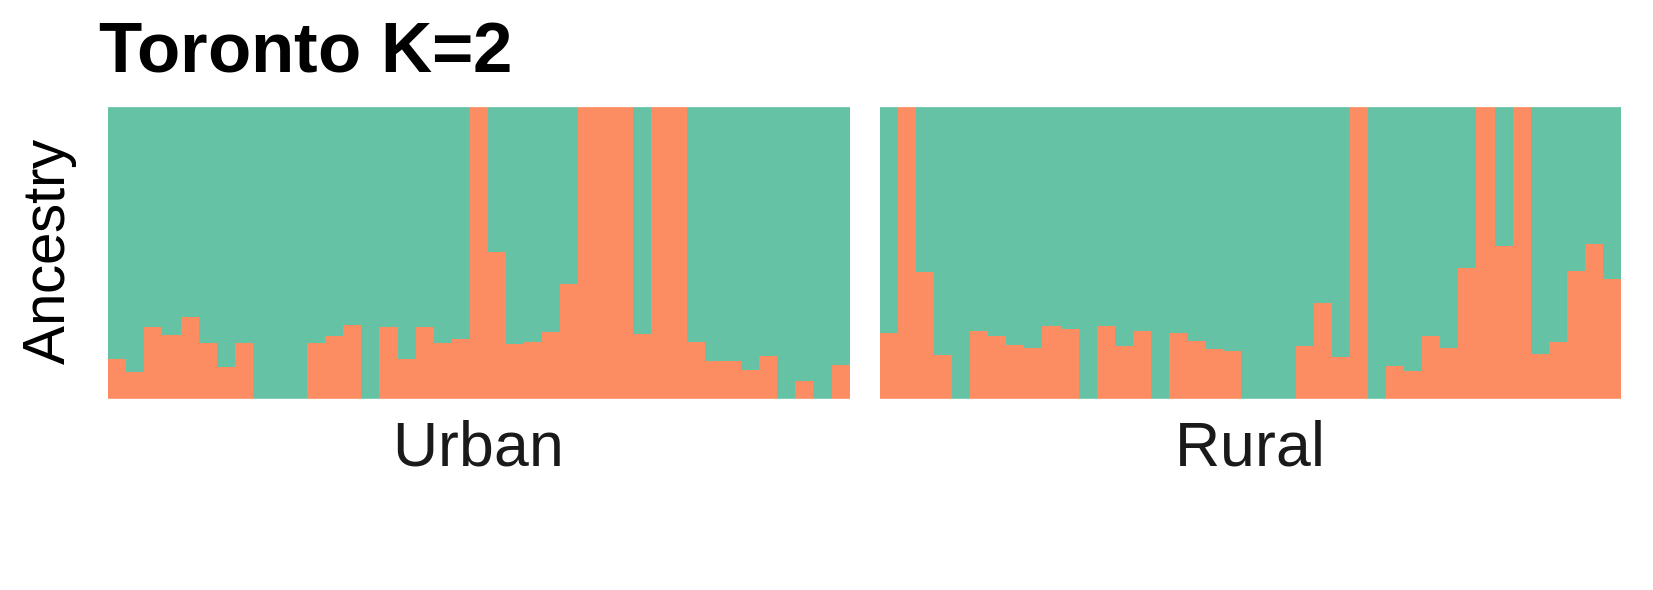

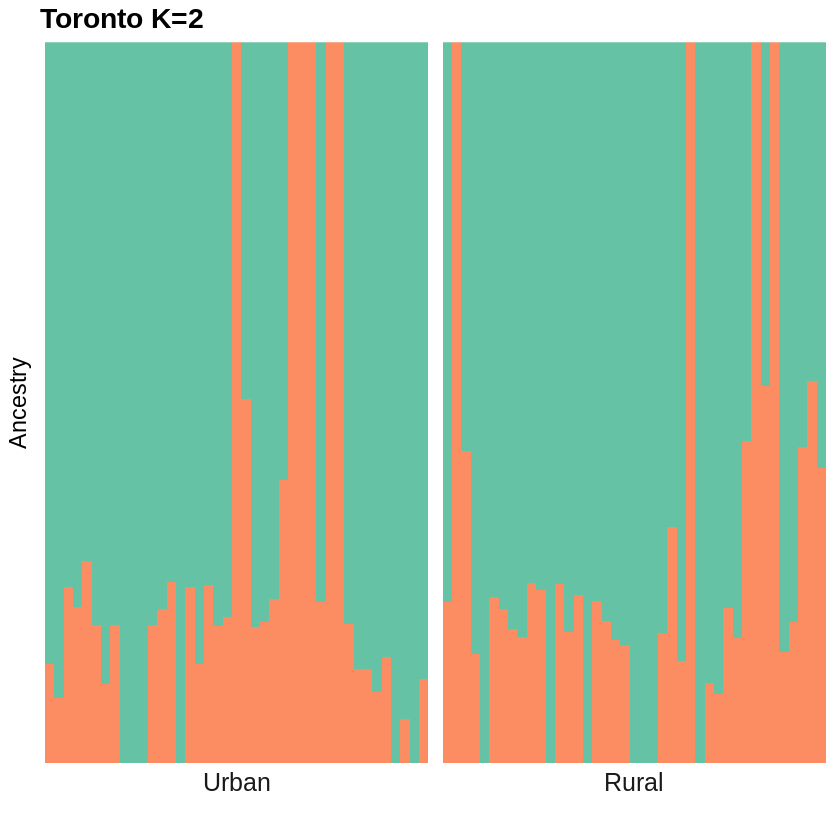

In [60]:
# Load admixture results for seed with lowest log likelihood
admix_results <- paste0(results_prefix, 'population_structure/ngsadmix/',city,'/K',bestK,'/ngsadmix_',city,'_4fold_maf0.05_K',bestK,'_seed',bestSeed,'.qopt')

# /!\ CHANGE CITY NAME HERE /!\

admix <- suppressMessages(read_delim(admix_results, col_names = FALSE, delim = " ")) %>%
    dplyr::select(-X3) %>%
    bind_cols(., Toronto_order_detail) %>% 
    pivot_longer(X1:X2, values_to = 'Probs') %>% 
    mutate(Probs = round(Probs, 5))
head(admix)

#cols_admix <- wes_palette("Darjeeling1", n=6, type = 'continuous')

kplot <-
  ggplot(admix, aes(factor(sample), Probs, fill = factor(name))) +
  geom_col(width=1) +
  facet_grid(~fct_inorder(site), scales = "free", switch = "x", space = "free") +
  theme_minimal() + labs(x="",title = "Toronto K=2", y = "Ancestry") +
  scale_y_continuous(expand = c(0, 0)) +
  scale_x_discrete(expand = expansion(add = 1)) +
 #scale_fill_manual(values = cols_admix) + 
 #scale_color_manual(values = cols_admix) +
  scale_fill_brewer(palette="Set2")+
  theme(
    legend.position = 'none',
    panel.spacing.x = unit(0.2, "lines"),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size=10),
    axis.title = element_text(size=14),
    strip.text.x = element_text(size = 15),
    plot.title = element_text(size = 17, face = 'bold'),
    axis.text.y = element_blank()
  ) 
  
kplot

ggsave(
  "ADMIX_Toronto_K2.png",
  plot = kplot,
  device = png,
  path = "/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/",
  width = 14,
  height = 5,
  units = "cm",
  dpi = 300
)

path_to_kplot<-"/scratch/projects/trifolium/glue/demography/glue_demography/genomic-analyses/analyses/figures/admixture/K2/ADMIX_Toronto_K2.png"
display_png(file=path_to_kplot)